In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
credit_card=pd.read_csv("/kaggle/input/credit-card/Credit_card.csv")
credit_card.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [3]:
credit_card.shape

(1548, 18)

In [4]:
credit_card_label=pd.read_csv("/kaggle/input/credit-card/Credit_card_label.csv")
credit_card_label.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [5]:
credit_card_label.shape

(1548, 2)

* Label 0 : Approved
* Label 1 : Rejected

#### We have two different datasets, one containing independent variables and the other contains dependent variable,so merging the two datasets based on Ind_ID

In [6]:
credit_data_raw=credit_card.merge(credit_card_label )

credit_data_raw.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [7]:
credit_data=credit_data_raw.copy()

In [8]:
credit_data.sample(3)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
150,5135990,F,N,Y,1,585000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10430.0,-900,1,0,0,0,Managers,2,1
163,5146005,M,Y,Y,0,225000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10177.0,-189,1,0,0,1,Managers,1,1
1538,5125816,F,Y,N,0,450000.0,Pensioner,Higher education,Married,House / apartment,-19783.0,-5521,1,1,1,0,Managers,2,0


In [9]:
credit_data.shape

(1548, 19)

* The dataset contains 1548 observations with 19 features

In [10]:
credit_data.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

In [11]:
credit_data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

#### Renaming the features

In [12]:
credit_data.rename(columns={'GENDER':'Gender','Propert_Owner':'Property_owner','CHILDREN':'Children','Type_Income':'Income_type',
                           'EDUCATION':'Education','EMAIL_ID':'Email_ID','Type_Occupation':'Occupation_type'}, inplace=True)

In [13]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Property_owner   1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Income_type      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_ID         1548 non-null   int64  
 16  Occupation_type  1060 non-null   object 
 17  Family_Members

In [14]:
# Checking if there are any duplicates

credit_data.duplicated().sum()

0

* There are no duplicates in the dataset

In [15]:
credit_data.isna().sum()

Ind_ID               0
Gender               7
Car_Owner            0
Property_owner       0
Children             0
Annual_income       23
Income_type          0
Education            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
Email_ID             0
Occupation_type    488
Family_Members       0
label                0
dtype: int64

* There are missing values in the below features:
    * Gender
    * Annual_income
    * Occupation_type
    * Birthday_count

In [16]:
credit_data.head(5)

,Ind_ID,Gender,Car_Owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,Email_ID,Occupation_type,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


* Birthday_count: Use backward count from current day (0), -1 means yesterday.

* Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

So changing Birthday_count feature to Age and Employed_days to Experience

In [17]:
# Checking if there are any observations of Birthday_count >0 

credit_data[credit_data['Birthday_count']>0]

,Ind_ID,Gender,Car_Owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,Email_ID,Occupation_type,Family_Members,label


* There are no observations with positive birthday count

In [18]:
# Creating the Age column by dividing the birthday_count with 365, because birthday_count is given as no of days 
# and we are converting this into age in years by dividing it with 365

credit_data['Age']=np.abs((credit_data['Birthday_count'])/365)

In [19]:
# Checking if there are any employed_days > 0

credit_data[credit_data['Employed_days']>0].shape

(261, 20)

* There are 261 observations which have employed days in positive (so there are not working)

In [20]:
# Similar to age, we get experience in years by dividing employed_days with 365


credit_data['Experience']=np.abs(credit_data['Employed_days'])/365

### Removing the below features:
    > Ind_ID
    > Birthday_count : because using this feature, we have created age 
    > Employed_days  : using this feature, we have created experience

In [21]:
credit_data.drop(columns=['Ind_ID','Birthday_count','Employed_days'], inplace=True)

In [22]:
credit_data[credit_data['Experience']>=1000]

,Gender,Car_Owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,Email_ID,Occupation_type,Family_Members,label,Age,Experience
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,NaN,2,1,51.430137,1000.665753
7,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,0,0,NaN,2,1,60.641096,1000.665753
26,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,1,0,NaN,2,1,59.813699,1000.665753
27,F,N,Y,0,NaN,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,1,0,NaN,2,1,59.813699,1000.665753
31,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,1,1,NaN,2,1,59.934247,1000.665753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,F,Y,Y,0,157500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,1,0,0,0,NaN,1,0,55.978082,1000.665753
1511,F,N,Y,0,216000.0,Pensioner,Higher education,Single / not married,House / apartment,1,0,0,0,NaN,1,0,55.857534,1000.665753
1514,F,N,N,0,69750.0,Pensioner,Secondary / secondary special,Widow,Municipal apartment,1,0,1,0,NaN,1,0,60.235616,1000.665753
1525,F,Y,Y,0,175500.0,Pensioner,Higher education,Married,House / apartment,1,0,1,0,NaN,2,0,60.484932,1000.665753


In [23]:
credit_data.describe()

,Children,Annual_income,Mobile_phone,Work_Phone,Phone,Email_ID,Family_Members,label,Age,Experience
count,1548.000000,1.525000e+03,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1526.000000,1548.000000
mean,0.412791,1.913993e+05,1.0,0.208010,0.309432,0.092377,2.161499,0.113049,43.946143,174.790814
std,0.776691,1.132530e+05,0.0,0.406015,0.462409,0.289651,0.947772,0.316755,11.587680,372.084734
min,0.000000,3.375000e+04,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,21.109589,0.200000
25%,0.000000,1.215000e+05,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,34.019178,3.180822
50%,0.000000,1.665000e+05,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,42.908219,6.791781
75%,1.000000,2.250000e+05,1.0,0.000000,1.000000,0.000000,3.000000,0.000000,53.569863,16.557534
max,14.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,15.000000,1.000000,68.345205,1000.665753


* If we observe the above data:
    * age varies from 21 years to 68 years
    * but experience varies from 0.2 years to 1000 years (experience with 1000 years is not possible)

* Dropping the observations which have experience greater than or equal to 1000 years

In [24]:
credit_data=credit_data[credit_data['Experience']<1000]

In [25]:
credit_data.shape

(1287, 18)

In [26]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 1 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1281 non-null   object 
 1   Car_Owner        1287 non-null   object 
 2   Property_owner   1287 non-null   object 
 3   Children         1287 non-null   int64  
 4   Annual_income    1268 non-null   float64
 5   Income_type      1287 non-null   object 
 6   Education        1287 non-null   object 
 7   Marital_status   1287 non-null   object 
 8   Housing_type     1287 non-null   object 
 9   Mobile_phone     1287 non-null   int64  
 10  Work_Phone       1287 non-null   int64  
 11  Phone            1287 non-null   int64  
 12  Email_ID         1287 non-null   int64  
 13  Occupation_type  1060 non-null   object 
 14  Family_Members   1287 non-null   int64  
 15  label            1287 non-null   int64  
 16  Age              1269 non-null   float64
 17  Experience    

In [27]:
credit_data.describe()

,Children,Annual_income,Mobile_phone,Work_Phone,Phone,Email_ID,Family_Members,label,Age,Experience
count,1287.00000,1.268000e+03,1287.0,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1269.000000,1287.000000
mean,0.48951,1.995793e+05,1.0,0.250194,0.310023,0.108003,2.263403,0.108780,40.697443,7.305687
std,0.82421,1.169466e+05,0.0,0.433293,0.462683,0.310505,0.977072,0.311484,9.678212,6.568594
min,0.00000,3.600000e+04,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,21.109589,0.200000
25%,0.00000,1.350000e+05,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,32.715068,2.552055
50%,0.00000,1.800000e+05,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,39.989041,5.350685
75%,1.00000,2.266875e+05,1.0,0.500000,1.000000,0.000000,3.000000,0.000000,48.150685,9.604110
max,14.00000,1.575000e+06,1.0,1.000000,1.000000,1.000000,15.000000,1.000000,65.326027,40.786301


* Now the experience varies from 0.2 years to 40 years

### EDA

In [28]:
credit_data.sample(3)

,Gender,Car_Owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,Email_ID,Occupation_type,Family_Members,label,Age,Experience
1058,F,N,Y,0,202500.0,Working,Higher education,Married,House / apartment,1,0,0,0,NaN,2,0,29.230137,4.095890
159,F,N,Y,0,67500.0,Commercial associate,Higher education,Separated,House / apartment,1,0,1,0,Core staff,1,1,51.923288,1.367123
987,F,N,N,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,1,0,NaN,2,0,51.520548,29.282192


In [29]:
sns.set_style(style='whitegrid')

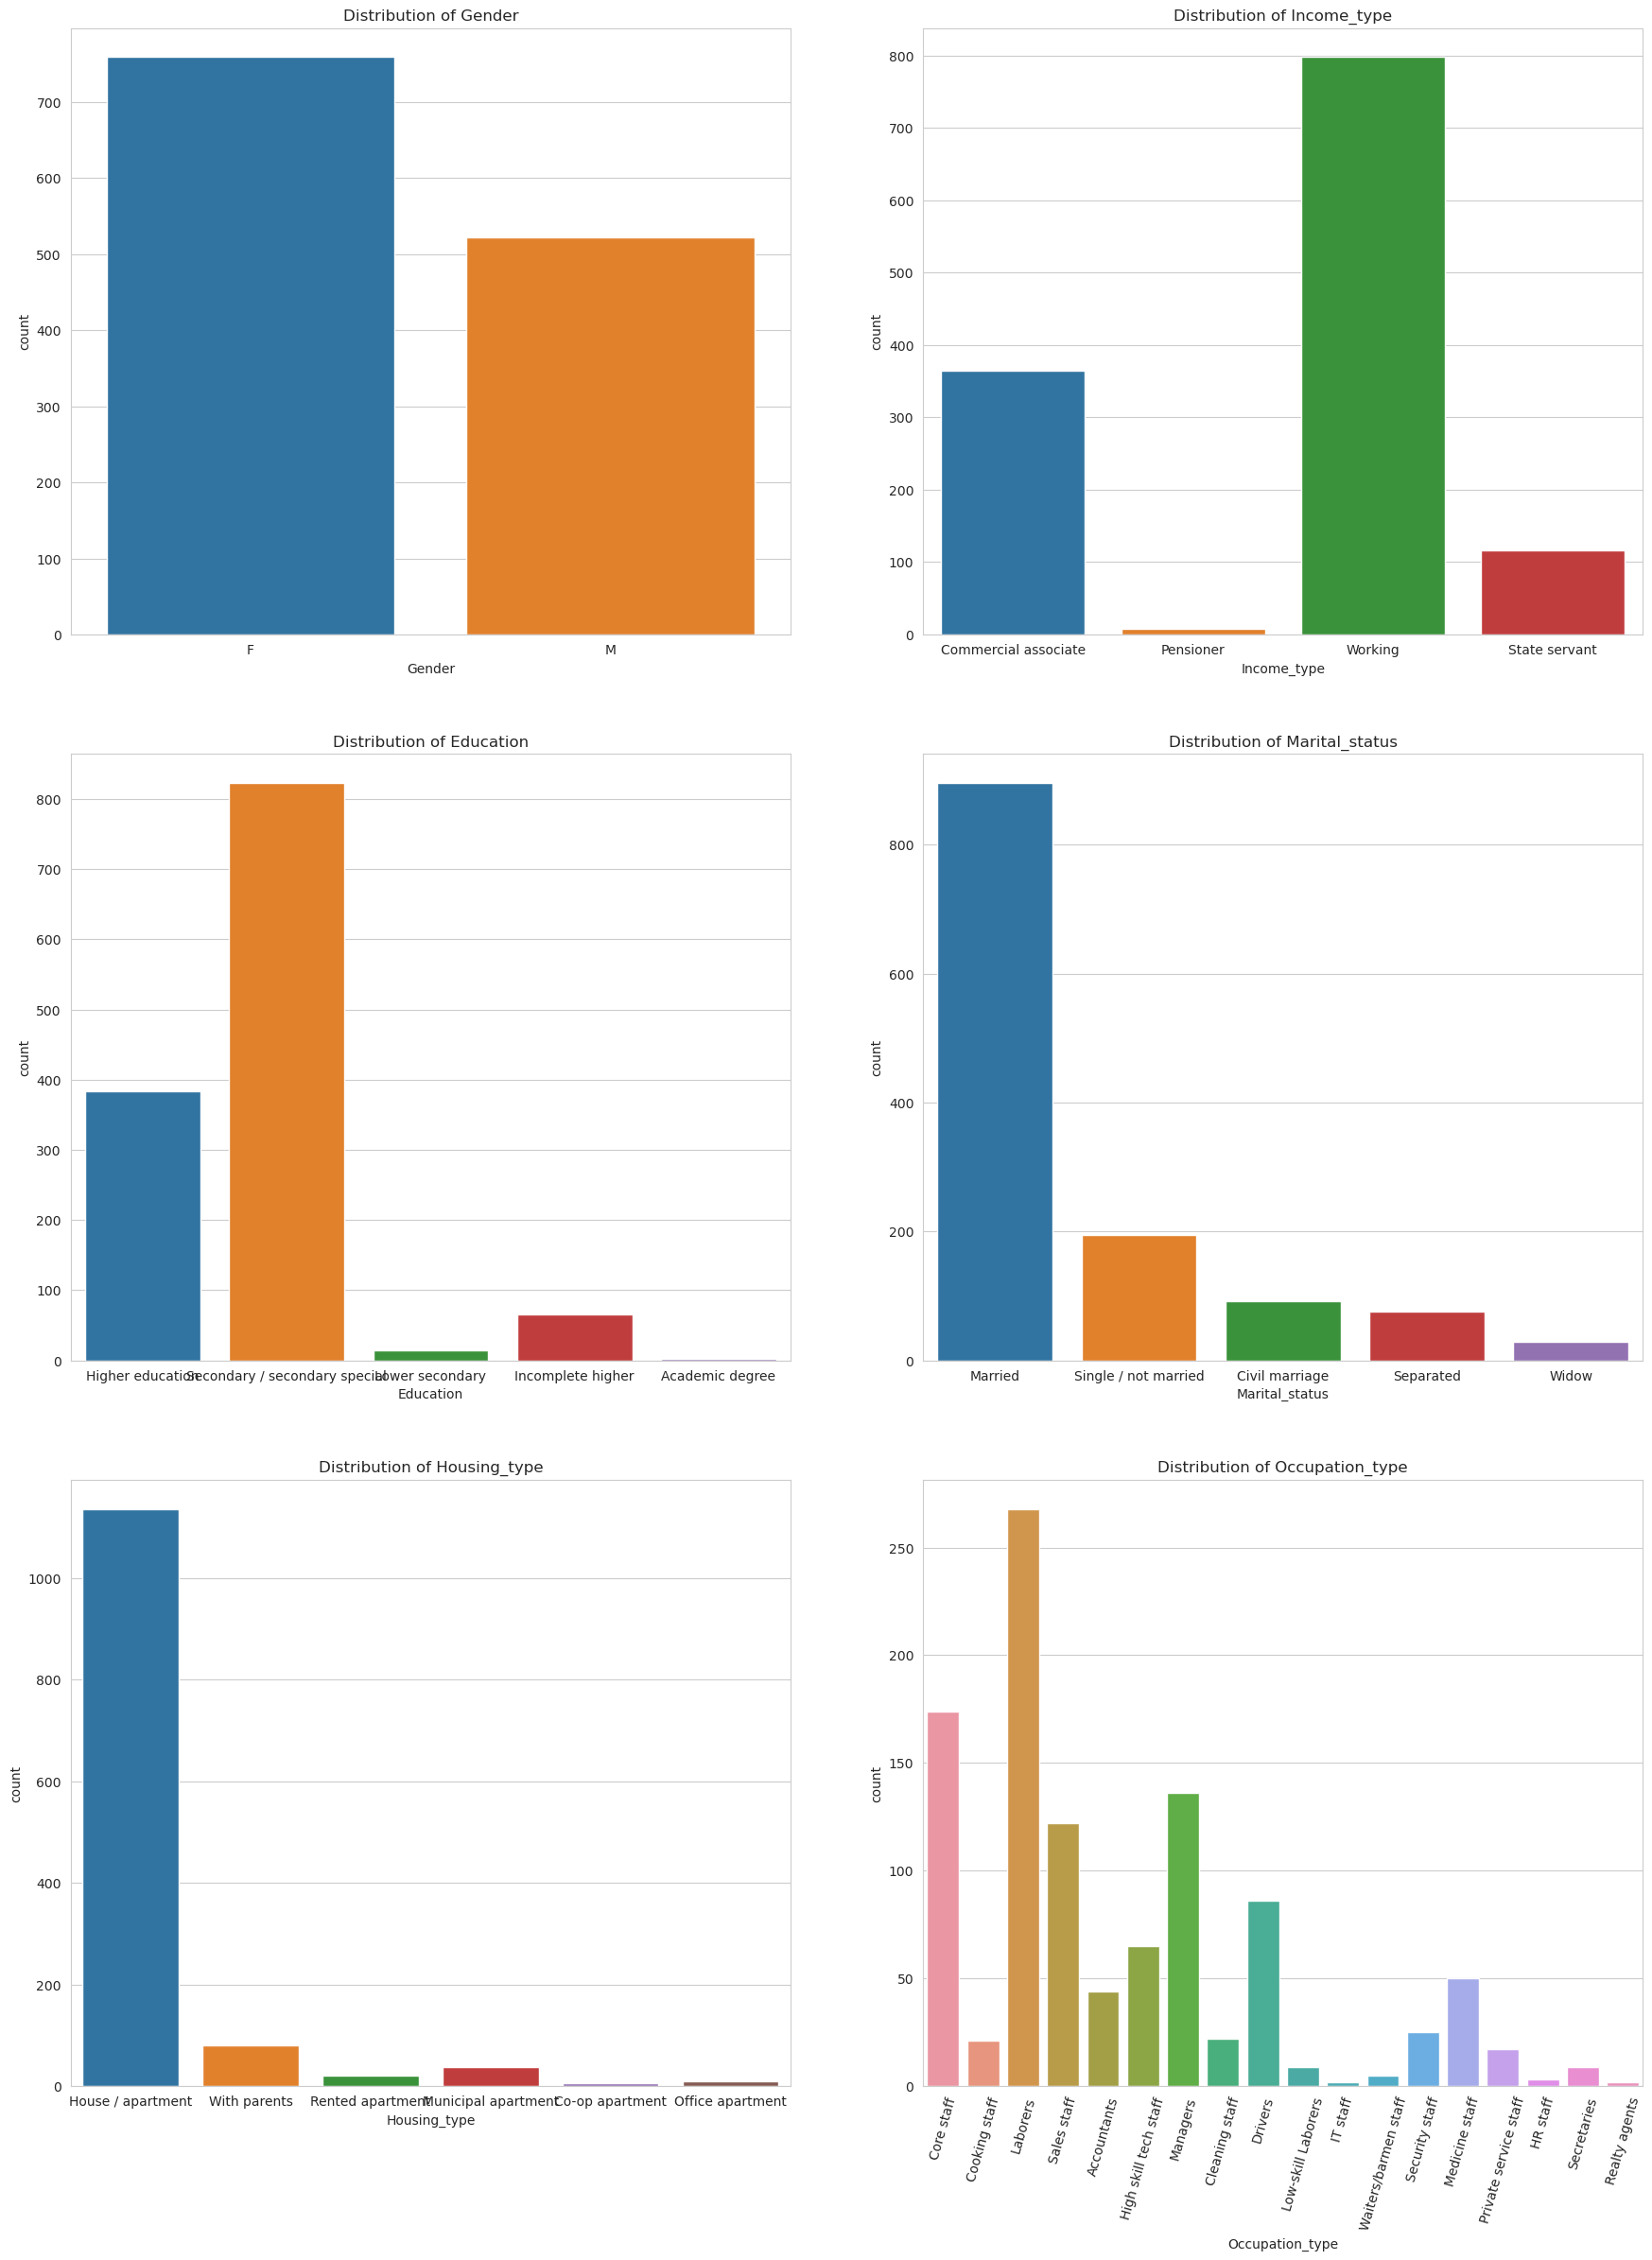

In [30]:
cols=['Gender','Income_type','Education','Marital_status','Housing_type','Occupation_type']
fig,ax = plt.subplots(3,2, figsize=(19,24))
fig.tight_layout(pad=7)

for i in range(0, len(cols)):
    for m in range(3):
        for n in range(2):
            sns.countplot(data=credit_data, x=cols[i], ax=ax[m,n])
            plt.xticks(rotation=74)
            ax[m,n].set_title(f"Distribution of {cols[i]}")
            i+=1
    break

* The female applicants are more
* The no of applicants with income_type as working are more
* Majority of the applicants completed Secondary/secondary special Education
* Most people are married
* Majority are living in their House/apartment
* Majority of people are working as Laborers

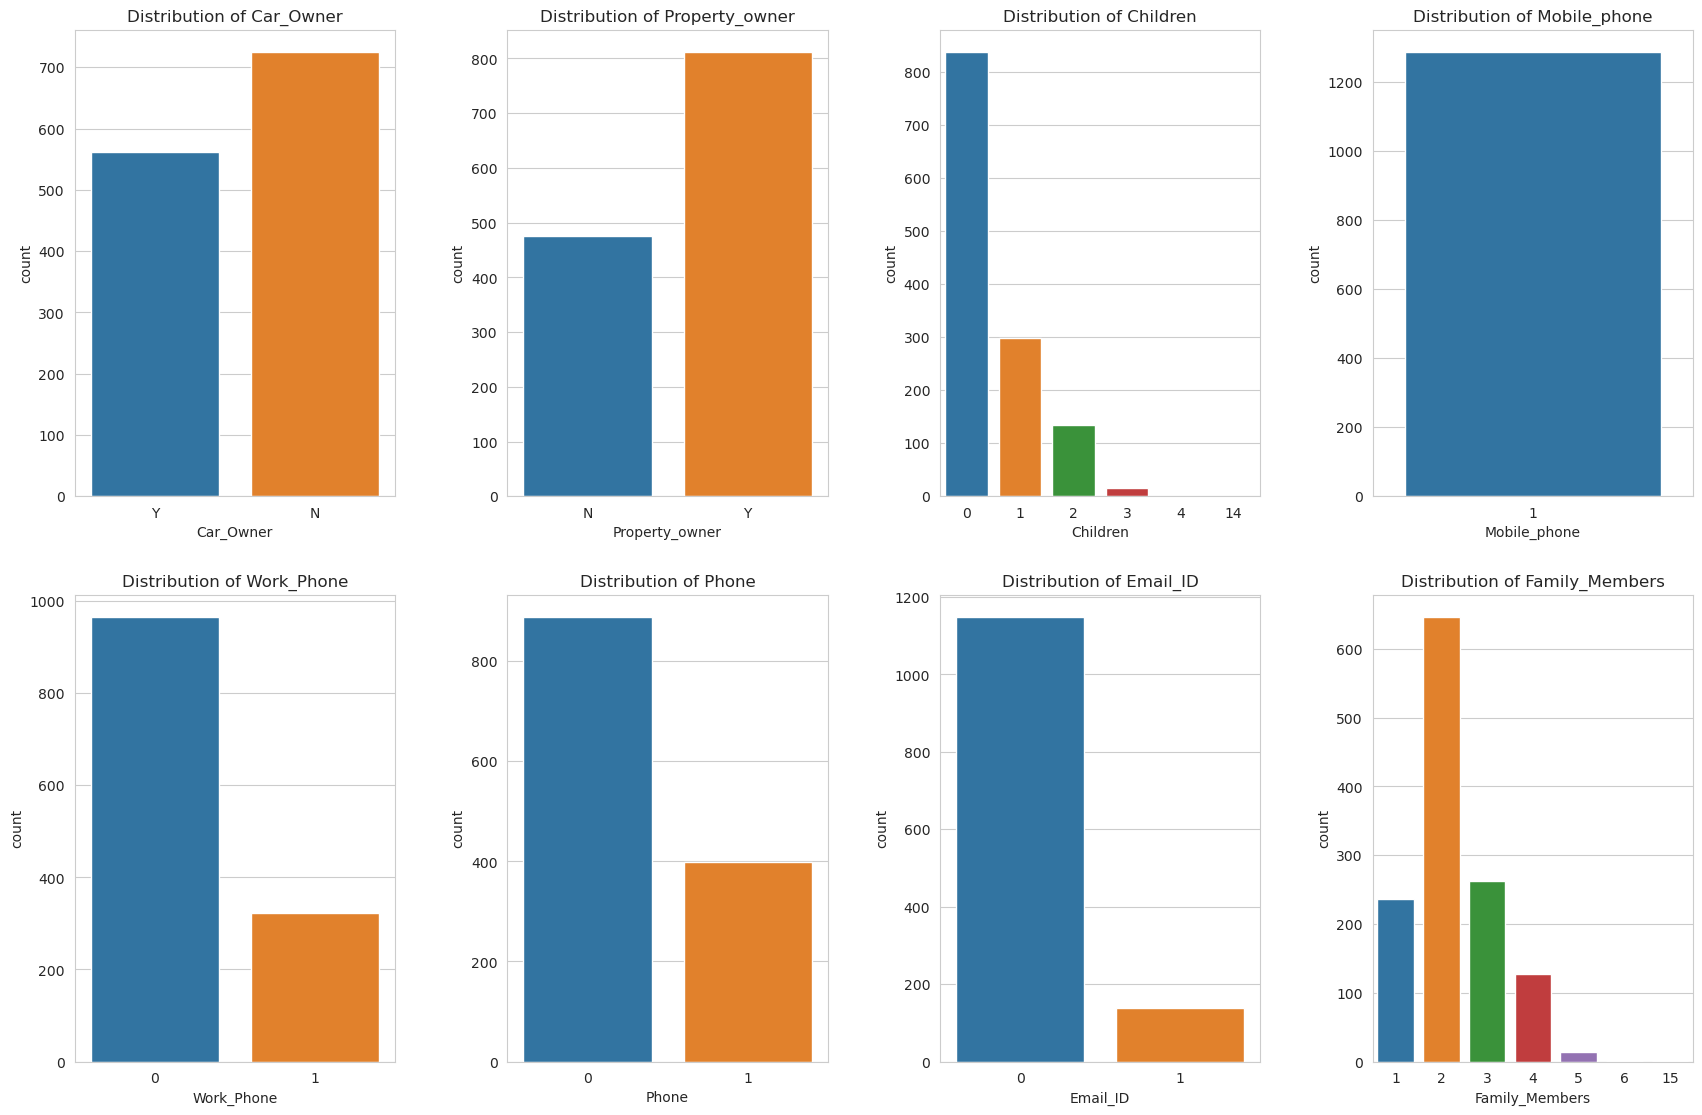

In [31]:
cols=['Car_Owner', 'Property_owner', 'Children', 'Mobile_phone', 'Work_Phone', 'Phone', 'Email_ID','Family_Members']

fig, ax = plt.subplots(2,4, figsize=(18,12))
fig.tight_layout(pad=5)
for i in range(0, len(cols)):
    for m in range(2):
        for n in range(4):
            sns.countplot(data=credit_data, x=cols[i], ax=ax[m,n])
            ax[m,n].set_title(f"Distribution of {cols[i]}")
            i+=1
    break
            

* Everyone has a mobile phone (Either a personal phone or work_phone or even both)
* Most applicants do not own a car
* Most applicants own a property
* Majority of applicants do not have Email_ID
* Most applicants do not have children and also majority of family members in the households are 2


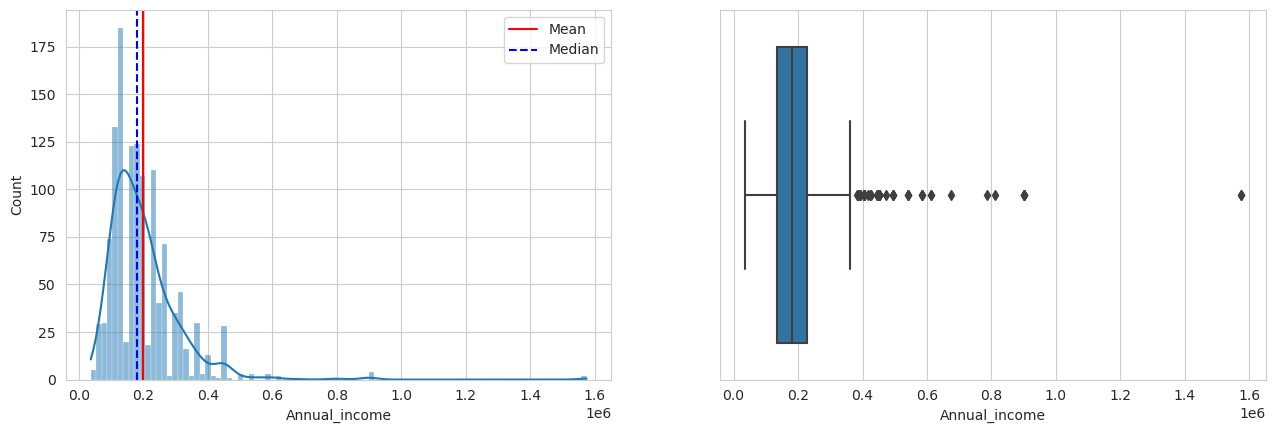

In [32]:
plt.subplot(1,2,1)
sns.histplot(data=credit_data, x='Annual_income',kde=True)
plt.axvline(x=credit_data['Annual_income'].mean(),color="red",label="Mean")
plt.axvline(x=credit_data['Annual_income'].median(),color="blue",label="Median", ls="--")
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(data=credit_data, x='Annual_income')

plt.subplots_adjust(right=2.0)
plt.show()


In [33]:
print("Mean : ", credit_data['Annual_income'].mean())
print("Median : ", credit_data['Annual_income'].median())

Mean :  199579.31545741323
Median :  180000.0


* The Annual_income feature has some outliers and it is right skewed

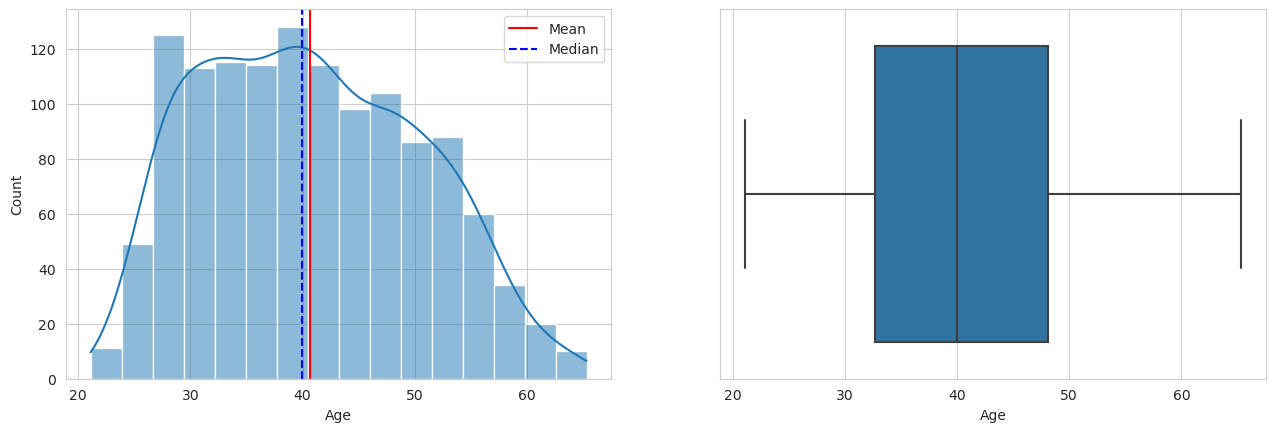

In [34]:
plt.subplot(1,2,1)
sns.histplot(data=credit_data, x='Age',kde=True)
plt.axvline(x=credit_data['Age'].mean(),color="red",label="Mean")
plt.axvline(x=credit_data['Age'].median(),color="blue",label="Median", ls="--")
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(data=credit_data, x='Age')

plt.subplots_adjust(right=2.0)

plt.show()


In [35]:
print("Mean : ", credit_data['Age'].mean())
print("Median : ", credit_data['Age'].median())

Mean :  40.69744270647797
Median :  39.989041095890414


* Age feature has no outliers

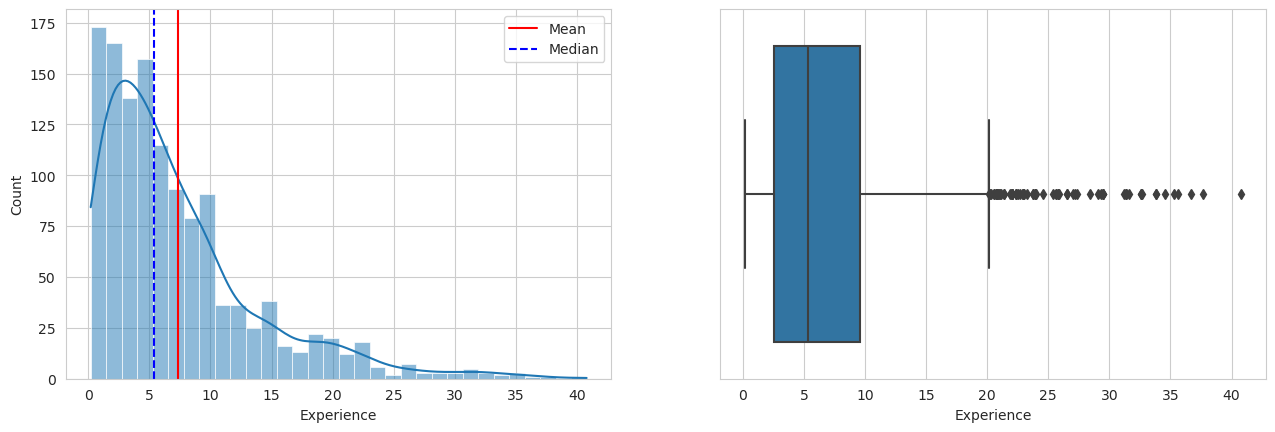

In [36]:
plt.subplot(1,2,1)
sns.histplot(data=credit_data, x='Experience',kde=True)
plt.axvline(x=credit_data['Experience'].mean(),color="red",label="Mean")
plt.axvline(x=credit_data['Experience'].median(),color="blue",label="Median", ls="--")
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(data=credit_data, x='Experience')

plt.subplots_adjust(right=2.0)

plt.show()


In [37]:
print("Mean : ", credit_data['Experience'].mean())
print("Median : ", credit_data['Experience'].median())

Mean :  7.305687007056871
Median :  5.35068493150685


* The feature Experience is right skewed and has some outliers

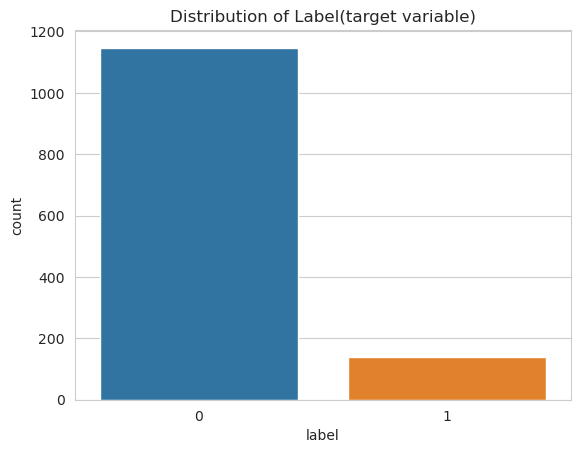

In [38]:
sns.countplot(data=credit_data, x='label')
plt.title("Distribution of Label(target variable)")
plt.show()

* We have an imbalanced dataset as there is a huge difference between approved (0) and rejected (1) applications

In [39]:
credit_data.sample(3)

,Gender,Car_Owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,Email_ID,Occupation_type,Family_Members,label,Age,Experience
1391,M,Y,Y,0,315000.0,Working,Higher education,Married,House / apartment,1,0,0,0,Drivers,2,0,50.232877,7.660274
1120,F,N,N,2,180000.0,State servant,Secondary / secondary special,Married,Office apartment,1,1,0,0,Laborers,4,0,30.619178,7.956164
412,M,Y,Y,1,427500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,1,0,Drivers,3,0,32.580822,6.967123


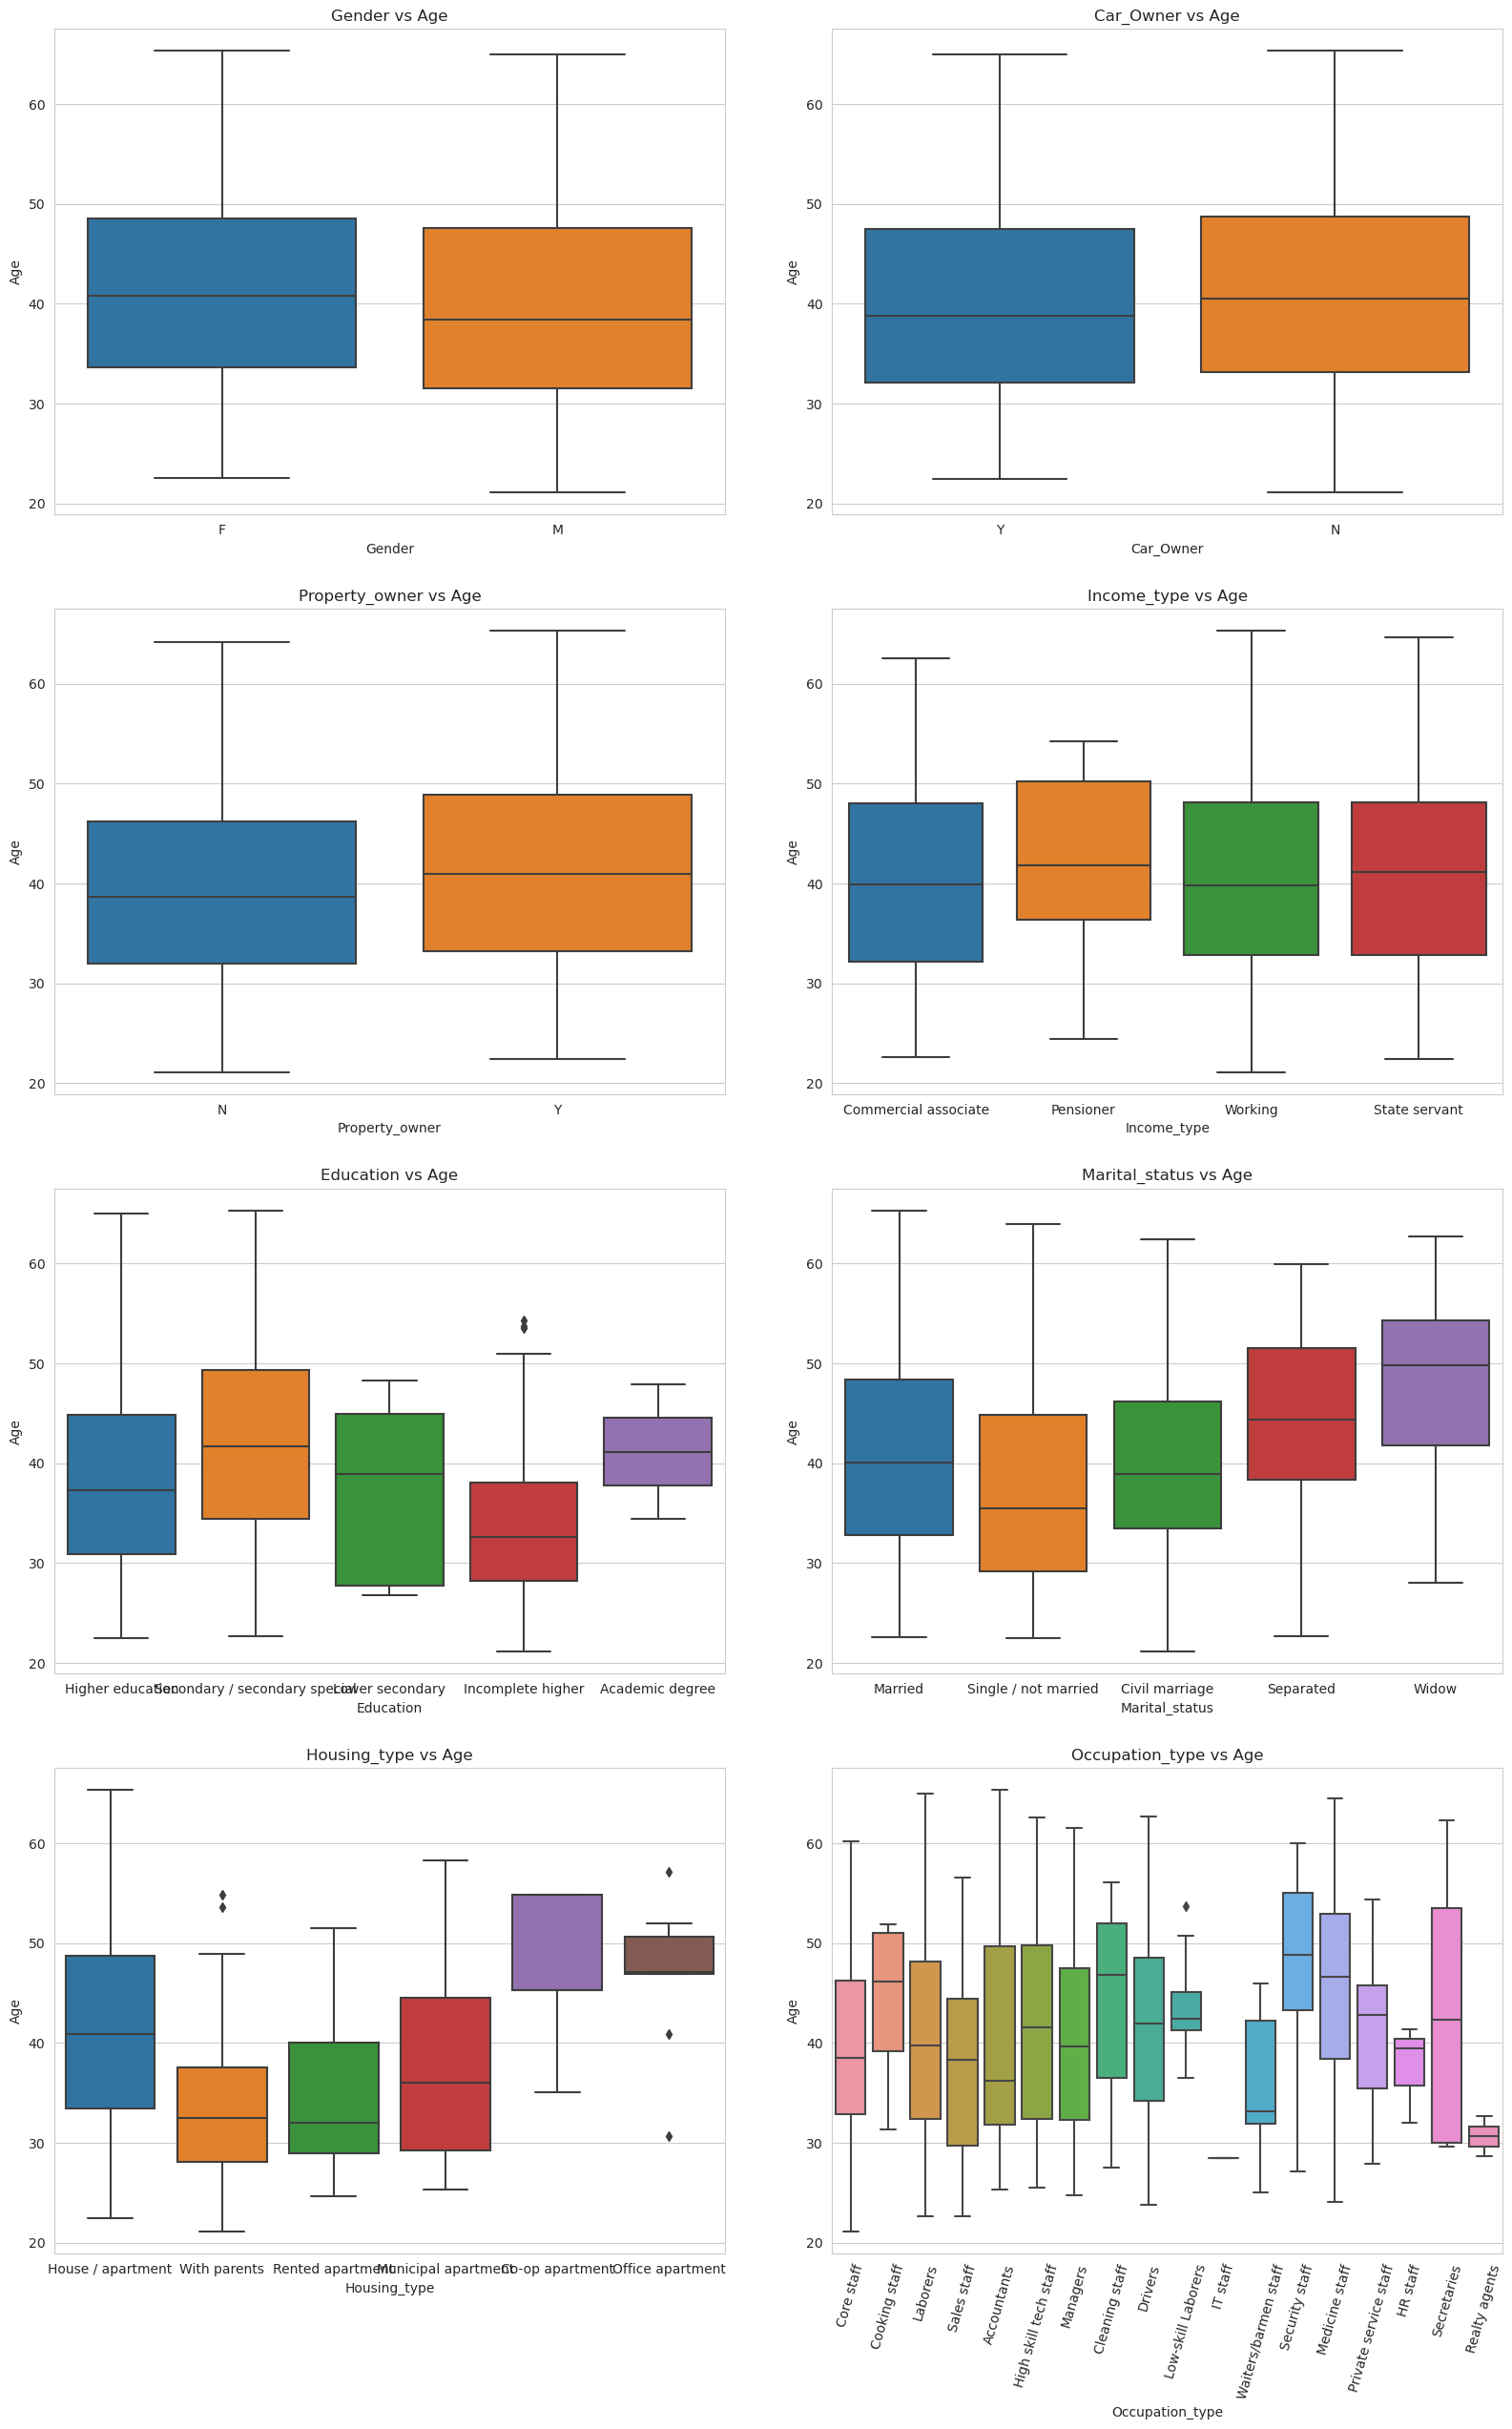

In [40]:
cat_fea=['Gender','Car_Owner','Property_owner','Income_type','Education','Marital_status','Housing_type','Occupation_type']

fig, ax = plt.subplots(4,2,figsize=(17,25))
fig.tight_layout(pad=5)
for i in range(0,len(cat_fea)):
    for m in range(4):
        for n in range(2):
            sns.boxplot(data=credit_data, x=cat_fea[i], y='Age', ax=ax[m,n])
            ax[m,n].set_title(cat_fea[i] +' '+ "vs Age")
            plt.xticks(rotation=74)
            i=i+1
    break

* Age of female applicants is more
* Low age applicants are tend to buy a car 
* People who owned property tend to have more age than people who do not have property
* People who are taking pensions has more age
* Applicants who are widowed has more age
* The age of people who are working as security staff is more


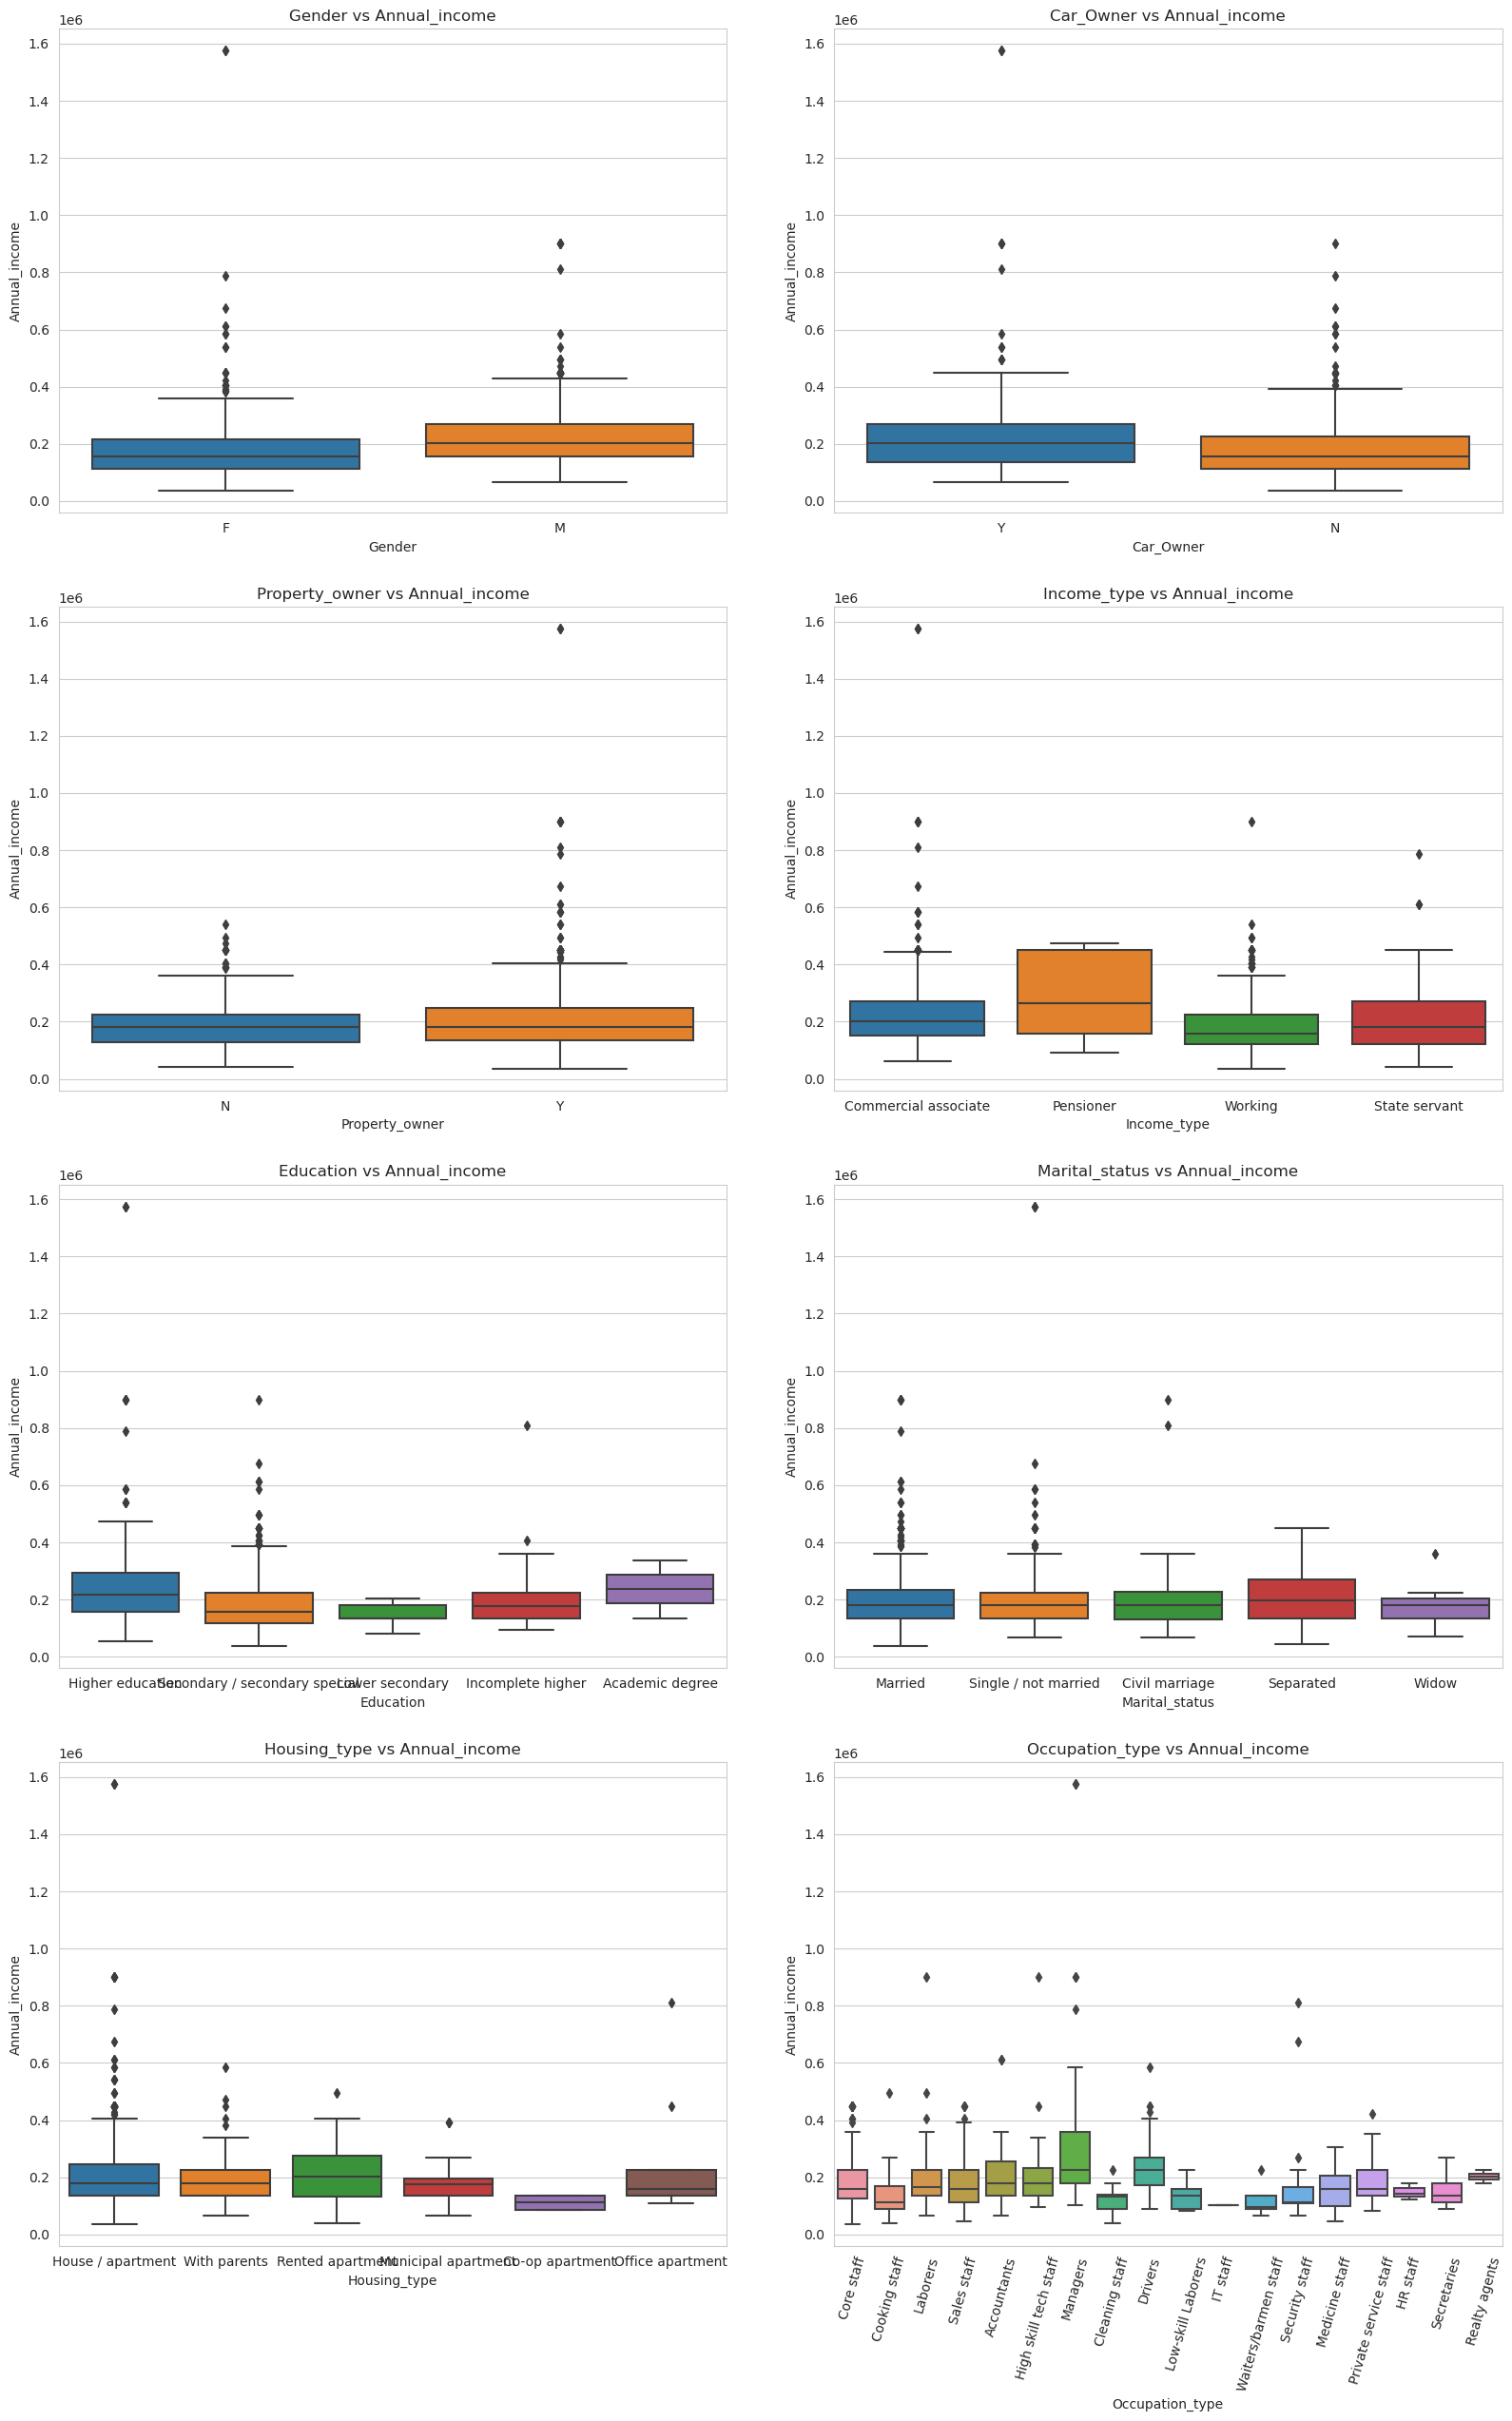

In [41]:
cat_fea=['Gender','Car_Owner','Property_owner','Income_type','Education','Marital_status','Housing_type','Occupation_type']

fig, ax = plt.subplots(4,2,figsize=(17,25))
fig.tight_layout(pad=5)
for i in range(0,len(cat_fea)):
    for m in range(4):
        for n in range(2):
            sns.boxplot(data=credit_data, x=cat_fea[i], y='Annual_income', ax=ax[m,n])
            ax[m,n].set_title(cat_fea[i] +' '+ "vs Annual_income")
            plt.xticks(rotation=74)
            i=i+1
    break
            
    

* Though there are more number of females the income of male is greater than female
* The applicants with more income has owned car
* Applicants who owned property and who do not owned property has almost same average income
* The applicants who have academic degree have high annual income
* Annual income of people having different marital status is almost similar
* The applicants who have more annual income tends to live in rented apartments
* People who are working as managers and drivers are earning more annual income


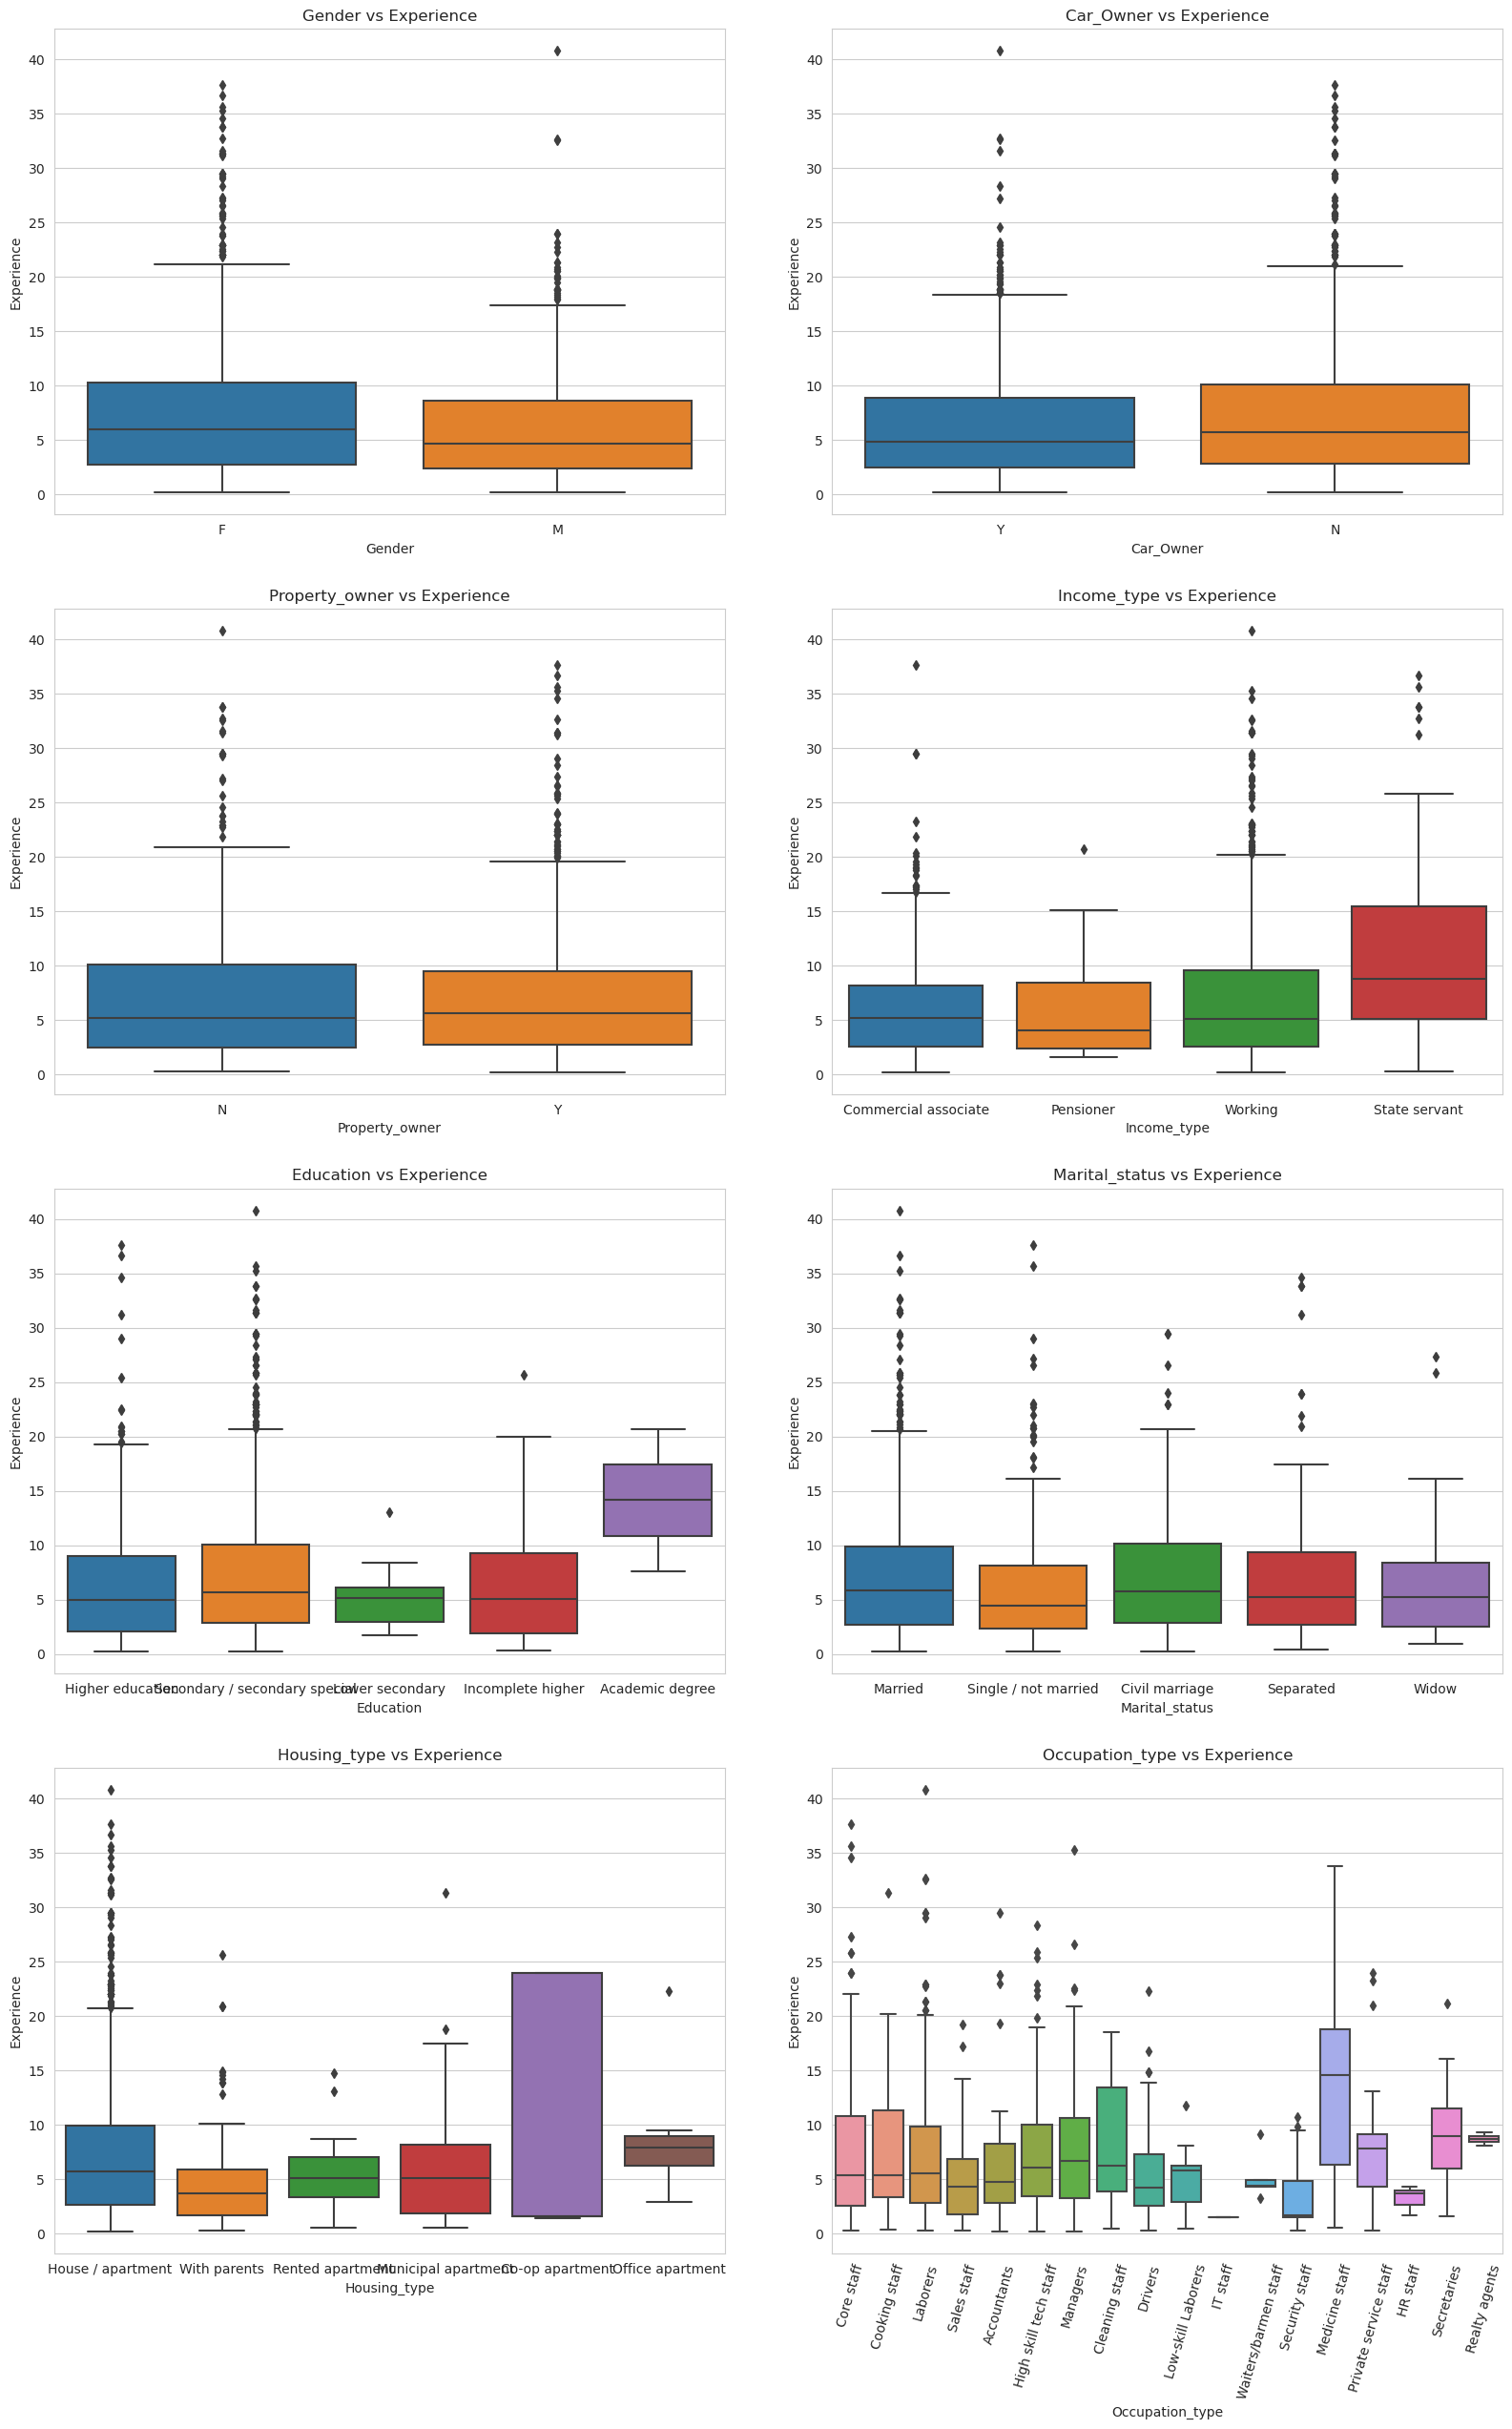

In [42]:
cat_fea=['Gender','Car_Owner','Property_owner','Income_type','Education','Marital_status','Housing_type','Occupation_type']

fig, ax = plt.subplots(4,2,figsize=(17,25))
fig.tight_layout(pad=5)
for i in range(0,len(cat_fea)):
    for m in range(4):
        for n in range(2):
            sns.boxplot(data=credit_data, x=cat_fea[i], y='Experience', ax=ax[m,n])
            ax[m,n].set_title(cat_fea[i] +' '+ "vs Experience")
            plt.xticks(rotation=74)
            i=i+1
    break
            
    

* The experience of male and female is almost similar
* People who are working as state servants have more experience
* Applicants who completed their academic degree have more experience
* Medicine staff has more experience


In [43]:
features=['Annual_income','Children','Family_Members','Age', 'Experience']

credit_data[features].corr()

,Annual_income,Children,Family_Members,Age,Experience
Annual_income,1.000000,0.049350,0.023836,-0.008012,-0.019428
Children,0.049350,1.000000,0.903850,-0.181872,-0.019140
Family_Members,0.023836,0.903850,1.000000,-0.143585,-0.006763
Age,-0.008012,-0.181872,-0.143585,1.000000,0.336366
Experience,-0.019428,-0.019140,-0.006763,0.336366,1.000000


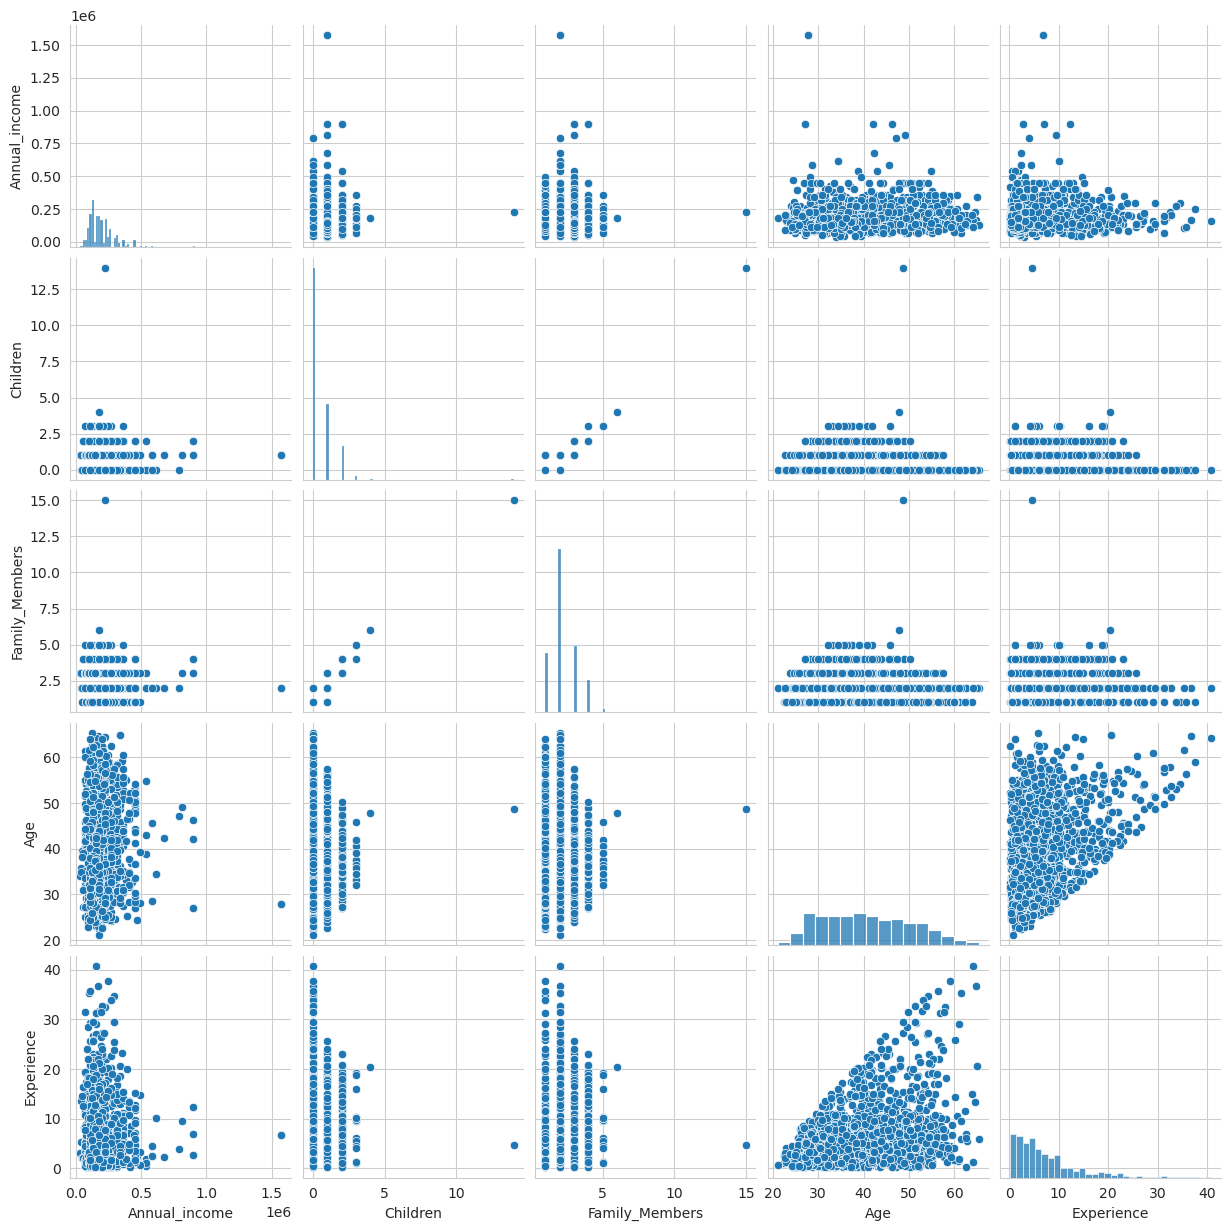

In [44]:
sns.pairplot(data=credit_data[features])
plt.show()

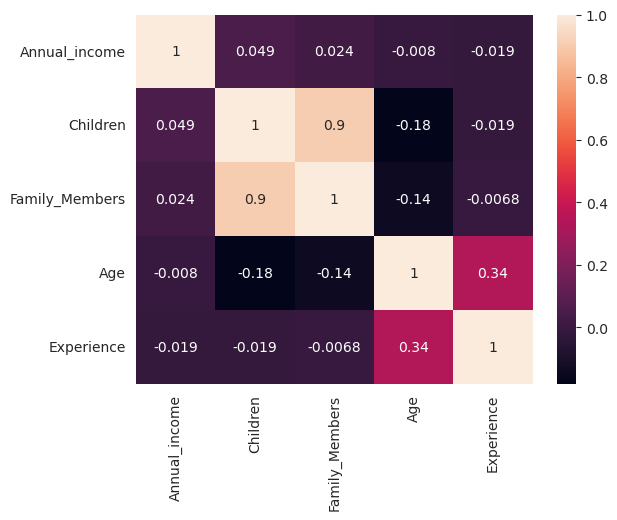

In [45]:
sns.heatmap(credit_data[features].corr(), annot=True)
plt.show()

* Children and Family members have linear corelation, that means more no of children results in more members in the family,so one of these features should be dropped
* Age and experience also show some corelation

### Handling missing values

In [46]:
credit_data.isna().sum()

Gender               6
Car_Owner            0
Property_owner       0
Children             0
Annual_income       19
Income_type          0
Education            0
Marital_status       0
Housing_type         0
Mobile_phone         0
Work_Phone           0
Phone                0
Email_ID             0
Occupation_type    227
Family_Members       0
label                0
Age                 18
Experience           0
dtype: int64

* Gender, Annual_income, age and occupation_type have missing values

In [47]:
# Percentage of missing values

credit_data.isna().mean()*100

Gender              0.466200
Car_Owner           0.000000
Property_owner      0.000000
Children            0.000000
Annual_income       1.476301
Income_type         0.000000
Education           0.000000
Marital_status      0.000000
Housing_type        0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
Email_ID            0.000000
Occupation_type    17.637918
Family_Members      0.000000
label               0.000000
Age                 1.398601
Experience          0.000000
dtype: float64

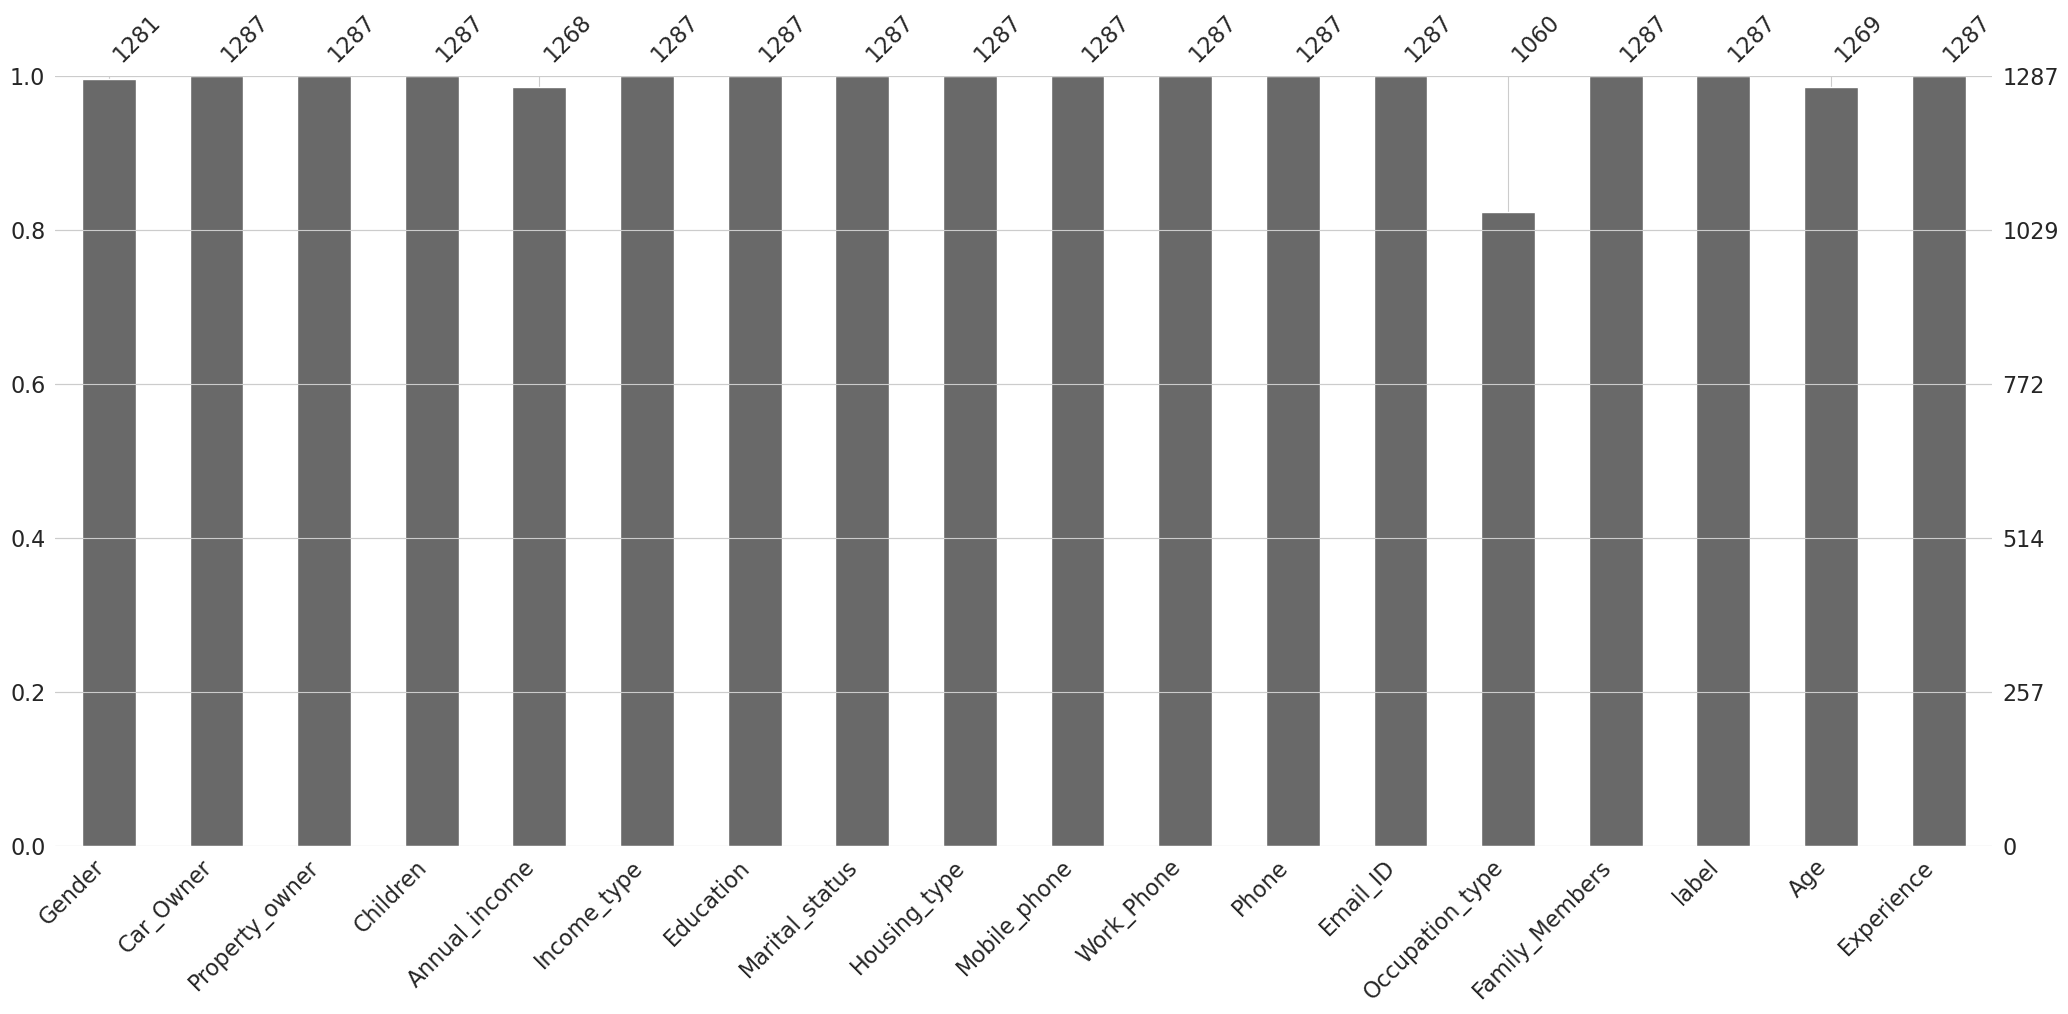

In [48]:
import missingno as msno

msno.bar(credit_data)
plt.show()

In [49]:
credit_missing=credit_data.copy()

#### Handling missing values of Gender

In [50]:
gender_missing=credit_missing[credit_missing['Gender'].isna()==True]
gender_missing

,Gender,Car_Owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,Email_ID,Occupation_type,Family_Members,label,Age,Experience
5,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.142466,1.605479
28,NaN,N,Y,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,High skill tech staff,2,1,30.441096,9.178082
82,NaN,Y,Y,0,360000.0,State servant,Higher education,Separated,House / apartment,1,0,0,0,Core staff,1,1,52.890411,5.219178
171,NaN,Y,N,1,450000.0,Working,Higher education,Married,House / apartment,1,0,1,1,Core staff,3,1,26.978082,1.375342
188,NaN,Y,N,1,450000.0,Working,Higher education,Married,House / apartment,1,0,1,0,Managers,3,0,41.219178,12.838356
240,NaN,Y,Y,0,225000.0,Commercial associate,Higher education,Single / not married,With parents,1,0,1,0,Sales staff,1,0,29.263014,5.895890


In [51]:
# Gender_wise mean age before treating missing values of gender

age_by_gender=credit_missing.groupby("Gender")['Age'].mean()
age_by_gender

Gender
F    41.481253
M    39.602692
Name: Age, dtype: float64

From EDA we found out that the age of female applicants is more than male, so computing the missing values of gender based on their respective mean ages 

In [52]:
# If age is greater than mean age of female then imputing that missing value of that gender as F and similarly for male also


for i in gender_missing.index:
    if gender_missing.loc[i,'Age'] > (age_by_gender['F']):
        gender_missing.loc[i,'Gender']='F'
    else:
        gender_missing.loc[i,'Gender']='M'

In [53]:
gender_missing

,Gender,Car_Owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,Email_ID,Occupation_type,Family_Members,label,Age,Experience
5,M,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.142466,1.605479
28,M,N,Y,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,High skill tech staff,2,1,30.441096,9.178082
82,F,Y,Y,0,360000.0,State servant,Higher education,Separated,House / apartment,1,0,0,0,Core staff,1,1,52.890411,5.219178
171,M,Y,N,1,450000.0,Working,Higher education,Married,House / apartment,1,0,1,1,Core staff,3,1,26.978082,1.375342
188,M,Y,N,1,450000.0,Working,Higher education,Married,House / apartment,1,0,1,0,Managers,3,0,41.219178,12.838356
240,M,Y,Y,0,225000.0,Commercial associate,Higher education,Single / not married,With parents,1,0,1,0,Sales staff,1,0,29.263014,5.895890


In [54]:
credit_missing[credit_missing["Gender"].isna()==True]=gender_missing

In [55]:
# After imputing missing values, gender-wise mean age

credit_missing.groupby("Gender")['Age'].mean()

Gender
F    41.496445
M    39.539044
Name: Age, dtype: float64

In [56]:
credit_missing['Gender'].isna().sum()

0

#### Handling missing values of Annual_income

In [57]:
credit_missing['Annual_income'].isna().sum()

19

In [58]:
annual_income_missing=credit_missing[credit_missing['Annual_income'].isna()==True]
annual_income_missing

,Gender,Car_Owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,Email_ID,Occupation_type,Family_Members,label,Age,Experience
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.142466,1.605479
12,F,Y,Y,0,NaN,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,Cooking staff,2,1,51.917808,2.745205
76,M,N,Y,1,NaN,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,0,Laborers,2,1,35.471233,0.375342
107,M,Y,N,0,NaN,Commercial associate,Higher education,Single / not married,Municipal apartment,1,0,1,1,High skill tech staff,1,1,31.583562,1.660274
152,M,Y,Y,2,NaN,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Managers,4,1,48.879452,11.794521
185,F,Y,Y,1,NaN,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,Cooking staff,3,0,38.964384,0.386301
215,F,N,Y,0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,Cleaning staff,2,0,52.904110,4.046575
273,F,N,Y,2,NaN,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,0,NaN,3,0,40.320548,4.098630
324,F,Y,Y,0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,1,0,Sales staff,2,0,47.479452,2.635616
381,M,N,Y,0,NaN,Commercial associate,Secondary / secondary special,Separated,House / apartment,1,0,0,0,Cleaning staff,1,0,51.356164,10.008219


In [59]:
mean_inc_byincome_type=credit_missing.groupby(['Income_type'])['Annual_income'].mean()
mean_inc_byincome_type

Income_type
Commercial associate    234600.000000
Pensioner               288000.000000
State servant           211422.413793
Working                 181048.757306
Name: Annual_income, dtype: float64

* Imputing the missing values of Annual_income based on the mean of Income_type

In [60]:
for i in annual_income_missing.index:
    for j in mean_inc_byincome_type.index:
        if annual_income_missing.loc[i,'Income_type']==j:
            annual_income_missing.loc[i,'Annual_income']=mean_inc_byincome_type[j]

In [61]:
annual_income_missing

,Gender,Car_Owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,Email_ID,Occupation_type,Family_Members,label,Age,Experience
3,F,Y,N,0,234600.000000,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.142466,1.605479
12,F,Y,Y,0,181048.757306,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,Cooking staff,2,1,51.917808,2.745205
76,M,N,Y,1,181048.757306,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,0,Laborers,2,1,35.471233,0.375342
107,M,Y,N,0,234600.000000,Commercial associate,Higher education,Single / not married,Municipal apartment,1,0,1,1,High skill tech staff,1,1,31.583562,1.660274
152,M,Y,Y,2,234600.000000,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,Managers,4,1,48.879452,11.794521
185,F,Y,Y,1,181048.757306,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,Cooking staff,3,0,38.964384,0.386301
215,F,N,Y,0,234600.000000,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,Cleaning staff,2,0,52.904110,4.046575
273,F,N,Y,2,181048.757306,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,0,NaN,3,0,40.320548,4.098630
324,F,Y,Y,0,234600.000000,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,1,0,Sales staff,2,0,47.479452,2.635616
381,M,N,Y,0,234600.000000,Commercial associate,Secondary / secondary special,Separated,House / apartment,1,0,0,0,Cleaning staff,1,0,51.356164,10.008219


In [62]:
credit_missing[credit_missing['Annual_income'].isna()==True]=annual_income_missing

In [63]:
credit_missing.groupby(["Income_type"])['Annual_income'].mean()

Income_type
Commercial associate    234600.000000
Pensioner               288000.000000
State servant           211422.413793
Working                 181048.757306
Name: Annual_income, dtype: float64

In [64]:
credit_missing['Annual_income'].isna().sum()

0

#### Handling missing values of Age

In [65]:
age_missing=credit_missing[credit_missing['Age'].isna()==True] 
age_missing

,Gender,Car_Owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,Email_ID,Occupation_type,Family_Members,label,Age,Experience
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,NaN,1.605479
70,M,N,N,0,391500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,1,0,0,0,Sales staff,1,1,NaN,1.391781
205,M,Y,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,NaN,2,0,NaN,1.597260
388,M,Y,Y,1,495000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,1,0,Managers,3,0,NaN,3.260274
473,M,Y,Y,0,157500.0,Working,Higher education,Married,House / apartment,1,0,0,0,Laborers,2,0,NaN,18.926027
503,F,N,N,0,144000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,1,0,Laborers,2,0,NaN,5.621918
539,M,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Laborers,3,0,NaN,6.235616
584,M,Y,N,2,112500.0,Working,Higher education,Married,House / apartment,1,1,1,0,High skill tech staff,4,0,NaN,18.336986
626,F,N,Y,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Sales staff,2,0,NaN,8.106849
743,F,N,N,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,1,1,0,0,Laborers,2,0,NaN,1.767123


In [66]:
meanage_income_type=credit_missing.groupby("Income_type")['Age'].mean()
meanage_income_type

Income_type
Commercial associate    40.219428
Pensioner               41.843493
State servant           41.490269
Working                 40.789276
Name: Age, dtype: float64

In [67]:
for i in age_missing.index:
    for j in meanage_income_type.index:
        if age_missing.loc[i,'Income_type']==j:
            age_missing.loc[i,'Age']=meanage_income_type[j]

In [68]:
age_missing

,Gender,Car_Owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,Email_ID,Occupation_type,Family_Members,label,Age,Experience
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,40.219428,1.605479
70,M,N,N,0,391500.0,Working,Secondary / secondary special,Single / not married,Municipal apartment,1,0,0,0,Sales staff,1,1,40.789276,1.391781
205,M,Y,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,NaN,2,0,40.789276,1.597260
388,M,Y,Y,1,495000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,1,0,Managers,3,0,40.219428,3.260274
473,M,Y,Y,0,157500.0,Working,Higher education,Married,House / apartment,1,0,0,0,Laborers,2,0,40.789276,18.926027
503,F,N,N,0,144000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,1,0,Laborers,2,0,40.789276,5.621918
539,M,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Laborers,3,0,40.789276,6.235616
584,M,Y,N,2,112500.0,Working,Higher education,Married,House / apartment,1,1,1,0,High skill tech staff,4,0,40.789276,18.336986
626,F,N,Y,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Sales staff,2,0,40.789276,8.106849
743,F,N,N,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,1,1,0,0,Laborers,2,0,40.789276,1.767123


In [69]:
credit_missing[credit_missing['Age'].isna()==True]=age_missing

In [70]:
credit_missing.groupby(['Income_type'])["Age"].mean()

Income_type
Commercial associate    40.219428
Pensioner               41.843493
State servant           41.490269
Working                 40.789276
Name: Age, dtype: float64

In [71]:
credit_missing['Age'].isna().sum()

0

#### Handling missing values of Occupation_type

In [72]:
credit_missing['Occupation_type'].isna().sum()

227

In [73]:
credit_missing['Occupation_type'].unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [74]:
ocuupation_type_missing=credit_missing[credit_missing['Occupation_type'].isna()==True]

ocuupation_type_missing.head(10)

,Gender,Car_Owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,Email_ID,Occupation_type,Family_Members,label,Age,Experience
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.142466,1.605479
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,40.219428,1.605479
3,F,Y,N,0,234600.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.142466,1.605479
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.142466,1.605479
5,M,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.142466,1.605479
6,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.142466,1.605479
14,M,N,N,1,472500.0,Pensioner,Higher education,Married,With parents,1,0,0,1,NaN,3,1,24.402740,2.501370
19,M,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,0,1,NaN,2,1,51.679452,4.504110
20,M,N,N,0,202500.0,Working,Higher education,Single / not married,House / apartment,1,0,0,0,NaN,1,1,35.098630,11.854795
25,F,Y,Y,0,540000.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,0,NaN,2,1,43.019178,0.506849


In [75]:
contigency_table=pd.crosstab(credit_missing['Income_type'],credit_missing['Occupation_type'])

In [76]:
contigency_table

Occupation_type,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
Income_type,,,,,,,,,,,,,,,,,,
Commercial associate,17,3,2,36,22,0,21,0,54,3,53,9,7,2,47,2,7,3
Pensioner,0,0,0,2,0,0,0,0,0,1,1,1,0,0,0,0,0,0
State servant,5,0,1,36,4,0,8,0,9,0,14,17,2,0,0,2,0,0
Working,22,19,18,100,60,3,36,2,205,5,68,23,8,0,75,5,18,2


In [77]:
contigency_table.sum(axis=1)

Income_type
Commercial associate    288
Pensioner                 5
State servant            98
Working                 669
dtype: int64

In [78]:
cond_prob=contigency_table.div(contigency_table.sum(axis=1), axis=0)

In [79]:
cond_prob

Occupation_type,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
Income_type,,,,,,,,,,,,,,,,,,
Commercial associate,0.059028,0.010417,0.006944,0.125000,0.076389,0.000000,0.072917,0.00000,0.187500,0.010417,0.184028,0.031250,0.024306,0.006944,0.163194,0.006944,0.024306,0.010417
Pensioner,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.00000,0.000000,0.200000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
State servant,0.051020,0.000000,0.010204,0.367347,0.040816,0.000000,0.081633,0.00000,0.091837,0.000000,0.142857,0.173469,0.020408,0.000000,0.000000,0.020408,0.000000,0.000000
Working,0.032885,0.028401,0.026906,0.149477,0.089686,0.004484,0.053812,0.00299,0.306428,0.007474,0.101644,0.034380,0.011958,0.000000,0.112108,0.007474,0.026906,0.002990


* If the applicant has income_type as Commercial associate, then the probability of that person being Accountants is 0.059028

In [80]:
for i in ocuupation_type_missing.index:
    for j in cond_prob.index:
        if ocuupation_type_missing.loc[i,'Income_type']==j:
            ocuupation_type_missing.loc[i,'Occupation_type']=np.random.choice(cond_prob.columns, p=cond_prob.loc[j])
            

In [81]:
ocuupation_type_missing[ocuupation_type_missing['Income_type']=='Pensioner']

,Gender,Car_Owner,Property_owner,Children,Annual_income,Income_type,Education,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,Email_ID,Occupation_type,Family_Members,label,Age,Experience
5,M,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,1,1,1,0,Core staff,2,1,37.142466,1.605479
14,M,N,N,1,472500.0,Pensioner,Higher education,Married,With parents,1,0,0,1,Core staff,3,1,24.402740,2.501370
19,M,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,0,1,Low-skill Laborers,2,1,51.679452,4.504110


In [82]:
credit_missing[credit_missing['Occupation_type'].isna()==True]=ocuupation_type_missing

In [83]:
credit_missing['Occupation_type'].isna().sum()

0

In [84]:
credit_missing.isna().sum()

Gender             0
Car_Owner          0
Property_owner     0
Children           0
Annual_income      0
Income_type        0
Education          0
Marital_status     0
Housing_type       0
Mobile_phone       0
Work_Phone         0
Phone              0
Email_ID           0
Occupation_type    0
Family_Members     0
label              0
Age                0
Experience         0
dtype: int64

### Handling Outliers

In [85]:
credit_outliers=credit_missing.copy()

In [86]:
credit_outliers.shape

(1287, 18)

In [87]:
credit_outliers.columns

Index(['Gender', 'Car_Owner', 'Property_owner', 'Children', 'Annual_income',
       'Income_type', 'Education', 'Marital_status', 'Housing_type',
       'Mobile_phone', 'Work_Phone', 'Phone', 'Email_ID', 'Occupation_type',
       'Family_Members', 'label', 'Age', 'Experience'],
      dtype='object')

#### Handling outliers Annual_income

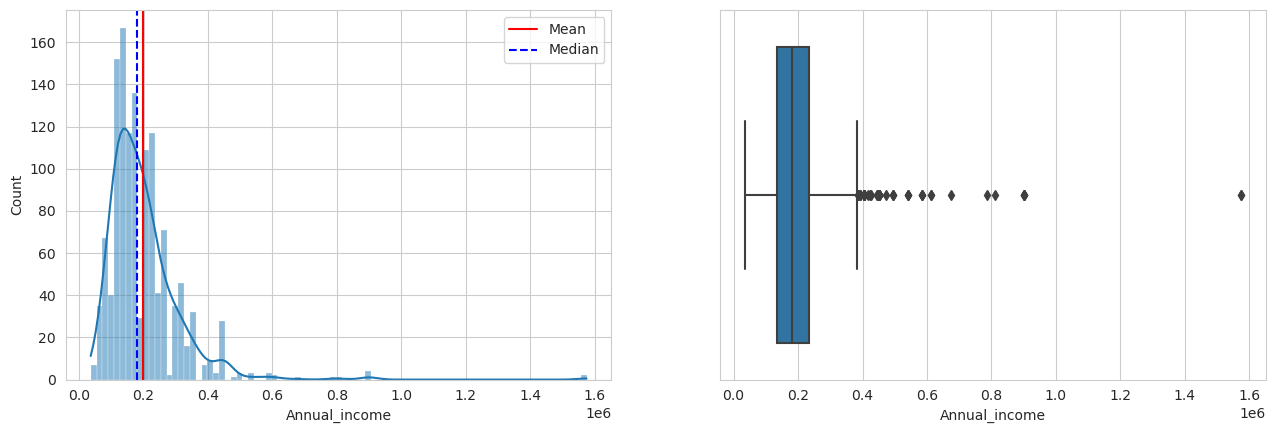

In [88]:
plt.subplot(1,2,1)
sns.histplot(data=credit_outliers, x='Annual_income',kde=True)
plt.axvline(x=credit_outliers['Annual_income'].mean(),color="red",label="Mean")
plt.axvline(x=credit_outliers['Annual_income'].median(),color="blue",label="Median", ls="--")
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(data=credit_outliers, x='Annual_income')

plt.subplots_adjust(right=2.0)
plt.show()


In [89]:
Q1=np.percentile(credit_outliers['Annual_income'],25)
Q3=np.percentile(credit_outliers['Annual_income'],75)

IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [90]:
upper_limit

382500.0

In [91]:
credit_outliers=credit_outliers[credit_outliers['Annual_income']<upper_limit]

#### After handling outliers of Annual_income

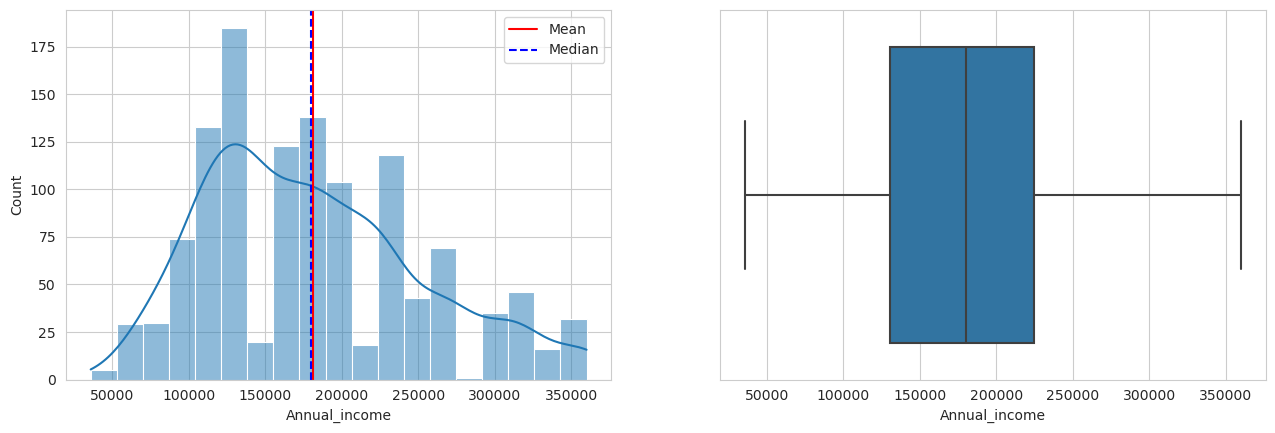

In [92]:
plt.subplot(1,2,1)
sns.histplot(data=credit_outliers, x='Annual_income',kde=True)
plt.axvline(x=credit_outliers['Annual_income'].mean(),color="red",label="Mean")
plt.axvline(x=credit_outliers['Annual_income'].median(),color="blue",label="Median", ls="--")
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(data=credit_outliers, x='Annual_income')

plt.subplots_adjust(right=2.0)
plt.show()


#### Handling outliers Experience

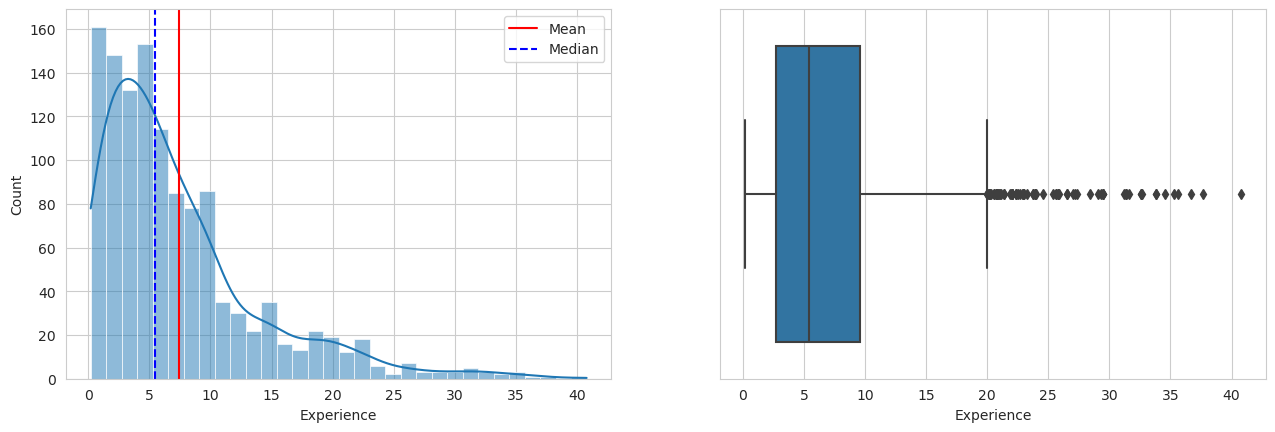

In [93]:
plt.subplot(1,2,1)
sns.histplot(data=credit_outliers, x='Experience',kde=True)
plt.axvline(x=credit_outliers['Experience'].mean(),color="red",label="Mean")
plt.axvline(x=credit_outliers['Experience'].median(),color="blue",label="Median", ls="--")
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(data=credit_outliers, x='Experience')

plt.subplots_adjust(right=2.0)

plt.show()


In [94]:
Q1=np.percentile(credit_outliers['Experience'],25, interpolation='midpoint')
Q3=np.percentile(credit_outliers['Experience'],75,interpolation='midpoint')

IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [95]:
upper_limit

19.982876712328768

In [96]:
credit_outliers=credit_outliers[credit_outliers['Experience']<upper_limit]

In [97]:
credit_outliers.shape

(1141, 18)

##### After handling outliers of experience

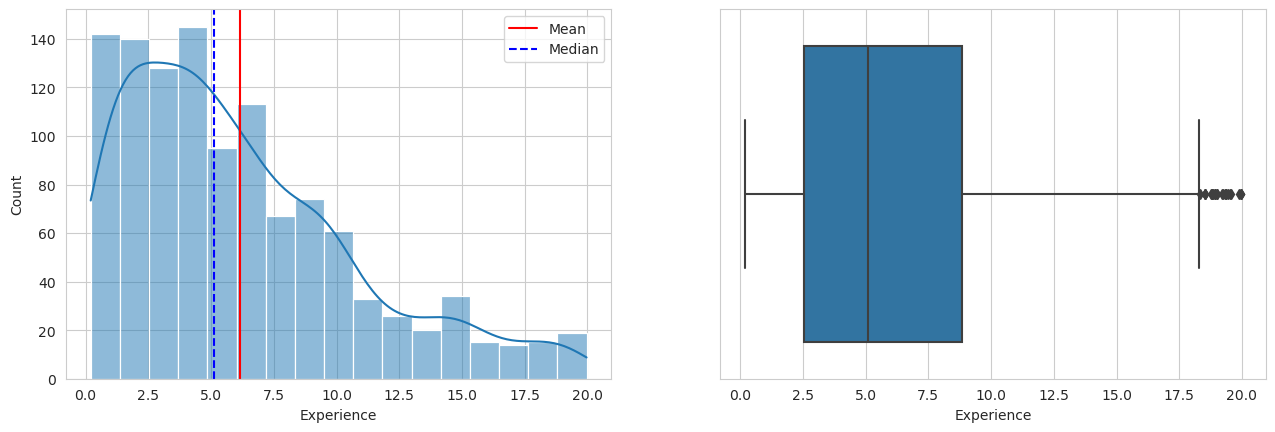

In [98]:
plt.subplot(1,2,1)
sns.histplot(data=credit_outliers, x='Experience',kde=True)
plt.axvline(x=credit_outliers['Experience'].mean(),color="red",label="Mean")
plt.axvline(x=credit_outliers['Experience'].median(),color="blue",label="Median", ls="--")
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(data=credit_outliers, x='Experience')

plt.subplots_adjust(right=2.0)

plt.show()


In [99]:
credit_outliers1=credit_outliers.copy()

In [100]:
credit_outliers1['Experience']=np.sqrt(credit_outliers1['Experience'])

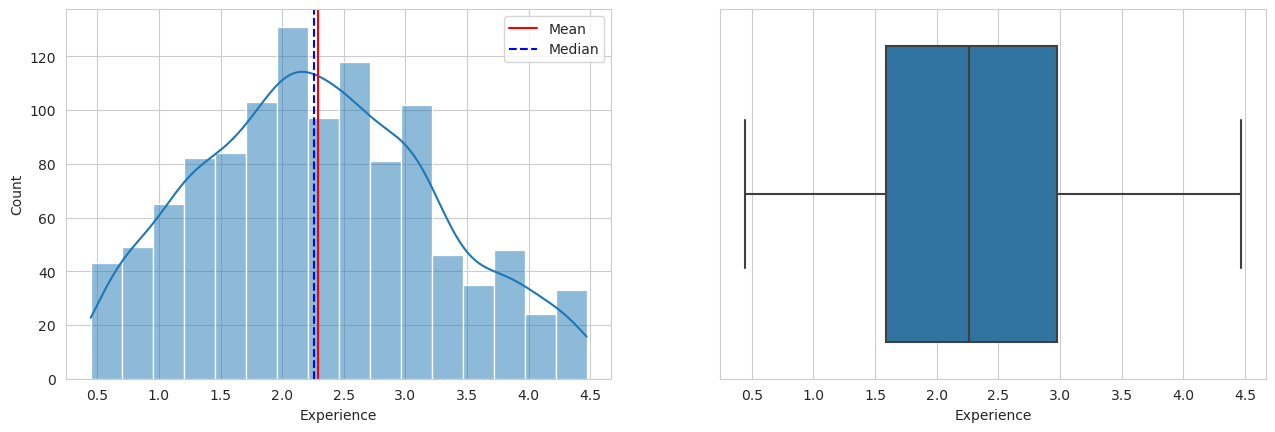

In [101]:
plt.subplot(1,2,1)
sns.histplot(data=credit_outliers1, x='Experience',kde=True)
plt.axvline(x=credit_outliers1['Experience'].mean(),color="red",label="Mean")
plt.axvline(x=credit_outliers1['Experience'].median(),color="blue",label="Median", ls="--")
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(data=credit_outliers1, x='Experience')

plt.subplots_adjust(right=2.0)

plt.show()


#### Handling outliers of Family_Members

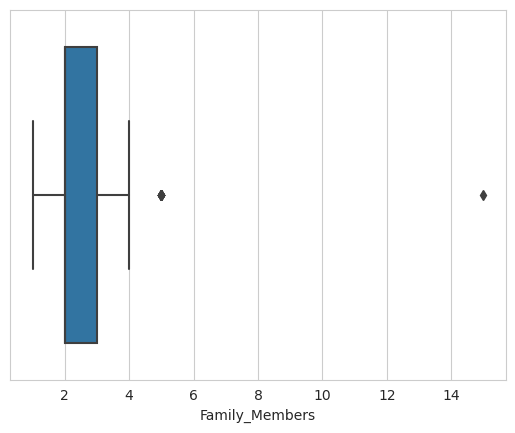

In [102]:
sns.boxplot(data=credit_outliers1, x='Family_Members')

plt.show()


In [103]:
credit_outliers1=credit_outliers1[credit_outliers1['Family_Members']<14]

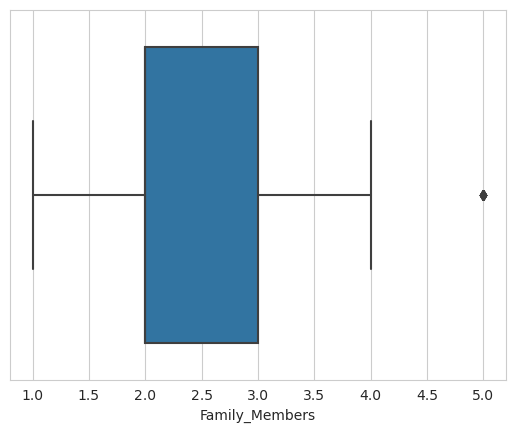

In [104]:
sns.boxplot(data=credit_outliers1, x='Family_Members')

plt.show()

In [105]:
credit_outliers1.columns

Index(['Gender', 'Car_Owner', 'Property_owner', 'Children', 'Annual_income',
       'Income_type', 'Education', 'Marital_status', 'Housing_type',
       'Mobile_phone', 'Work_Phone', 'Phone', 'Email_ID', 'Occupation_type',
       'Family_Members', 'label', 'Age', 'Experience'],
      dtype='object')

* The below are columns are dropped from the dataset:
    * Children ---> because children and family_members are corelated to each other, so dropping one of these columns
    * Mobile_phone ---> because it does not show any variation in the data that means it has only one value in the entire column

In [106]:
credit_clean=credit_outliers.drop(columns=['Children','Mobile_phone'])

### Feature Encoding

In [107]:
credit_encoding=credit_clean.copy()

In [108]:
credit_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1141 entries, 1 to 1547
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1141 non-null   object 
 1   Car_Owner        1141 non-null   object 
 2   Property_owner   1141 non-null   object 
 3   Annual_income    1141 non-null   float64
 4   Income_type      1141 non-null   object 
 5   Education        1141 non-null   object 
 6   Marital_status   1141 non-null   object 
 7   Housing_type     1141 non-null   object 
 8   Work_Phone       1141 non-null   int64  
 9   Phone            1141 non-null   int64  
 10  Email_ID         1141 non-null   int64  
 11  Occupation_type  1141 non-null   object 
 12  Family_Members   1141 non-null   int64  
 13  label            1141 non-null   int64  
 14  Age              1141 non-null   float64
 15  Experience       1141 non-null   float64
dtypes: float64(3), int64(5), object(8)
memory usage: 151.5+ KB


In [109]:
credit_encoding['Gender']=credit_encoding['Gender'].map({'M':1,'F':0})
credit_encoding['Car_Owner']=credit_encoding['Car_Owner'].map({'Y':1,'N':0})
credit_encoding['Property_owner']=credit_encoding['Property_owner'].map({'Y':1,'N':0})
    

#### Performing Ordinal Encoding for Education

In [110]:
credit_encoding['Education'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

The order of Education is:
* lower secondary
* secondary special
* incomplete higher
* higher
* academic

In [111]:
from sklearn.preprocessing import OrdinalEncoder
columns_order=['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education', 'Academic degree']
encoder_oe=OrdinalEncoder(categories=[columns_order])
credit_encoding['Education']=encoder_oe.fit_transform(credit_encoding[['Education']])

In [112]:
credit_encoding.sample(3)

,Gender,Car_Owner,Property_owner,Annual_income,Income_type,Education,Marital_status,Housing_type,Work_Phone,Phone,Email_ID,Occupation_type,Family_Members,label,Age,Experience
657,0,1,1,135000.0,Working,1.0,Married,House / apartment,0,0,0,Laborers,4,0,43.180822,8.693151
173,0,0,1,157500.0,Commercial associate,3.0,Married,House / apartment,0,1,1,Medicine staff,2,1,33.936986,3.630137
359,0,0,1,135000.0,Commercial associate,3.0,Married,House / apartment,1,0,1,Core staff,3,0,26.789041,7.972603


Performing One hot Encoder for the below features:
* Income_type
* Marital_status
* Housing_type
* Occupation_type

In [113]:
credit_encoding_ohe=credit_encoding[['Income_type','Marital_status','Housing_type','Occupation_type']]

In [114]:
credit_encoding['Occupation_type'].unique()

array(['Sales staff', 'Laborers', 'Medicine staff', 'Managers',
       'Core staff', 'Cooking staff', 'Low-skill Laborers',
       'Cleaning staff', 'Accountants', 'High skill tech staff',
       'Drivers', 'IT staff', 'Waiters/barmen staff', 'Security staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [115]:
credit_encoding=pd.get_dummies(credit_encoding, columns=['Income_type','Marital_status','Housing_type','Occupation_type'],
                              drop_first=True)

In [116]:
pd.set_option('display.max_columns', 100)
credit_encoding.sample(5)

,Gender,Car_Owner,Property_owner,Annual_income,Education,Work_Phone,Phone,Email_ID,Family_Members,label,Age,Experience,Income_type_Pensioner,Income_type_State servant,Income_type_Working,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Occupation_type_Cleaning staff,Occupation_type_Cooking staff,Occupation_type_Core staff,Occupation_type_Drivers,Occupation_type_HR staff,Occupation_type_High skill tech staff,Occupation_type_IT staff,Occupation_type_Laborers,Occupation_type_Low-skill Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Private service staff,Occupation_type_Realty agents,Occupation_type_Sales staff,Occupation_type_Secretaries,Occupation_type_Security staff,Occupation_type_Waiters/barmen staff
1187,1,0,1,292500.0,3.0,0,0,1,3,0,46.117808,9.630137,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
799,0,0,1,180000.0,1.0,0,0,0,4,0,35.200000,10.849315,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
295,0,0,0,112500.0,1.0,1,0,0,3,0,32.747945,13.991781,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
57,1,1,1,225000.0,1.0,0,0,0,2,1,49.082192,9.221918,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
668,0,0,1,270000.0,2.0,0,0,0,2,0,40.501370,9.306849,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [117]:
credit_encoding.shape

(1141, 41)

### Treating imbalanced dataset

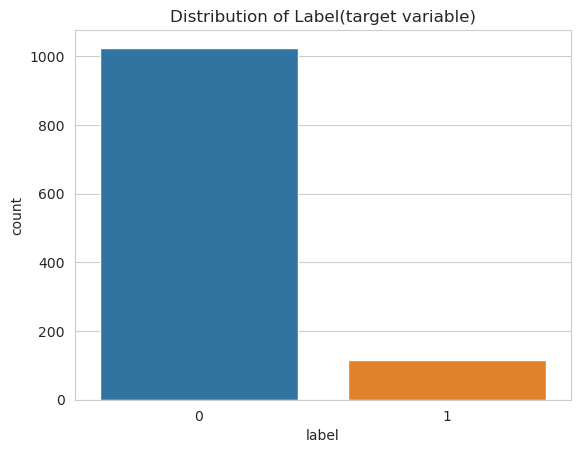

In [118]:
sns.countplot(data=credit_encoding, x='label')
plt.title("Distribution of Label(target variable)")
plt.show()

In [119]:
credit_encoding['label'].value_counts()

0    1025
1     116
Name: label, dtype: int64

In [120]:
X=credit_encoding.drop(columns=['label'])
y=credit_encoding['label']


In [121]:
from imblearn.over_sampling import SMOTE

oversample=SMOTE()
X, y = oversample.fit_resample(X, y)

* After performing SMOTE

In [122]:
y.value_counts()

1    1025
0    1025
Name: label, dtype: int64

#### Splitting the dataset into train and test

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=10)

In [124]:
X_train.shape

(1640, 40)

In [125]:
X_test.shape

(410, 40)

#### Feature Scaling

In [126]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [128]:
y_train_predict=log_model.predict(X_train_scaled)
y_train_predict

array([0, 1, 0, ..., 1, 0, 1])

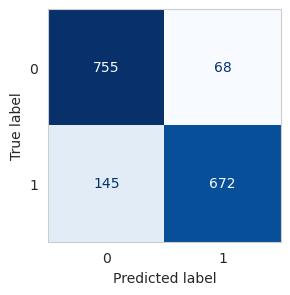

In [129]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay


fig, ax=plt.subplots(figsize=(3,5))
conf_matrix_log=confusion_matrix(y_train, y_train_predict)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predict,cmap="Blues", ax=ax, colorbar=False)
plt.grid(visible=None)
plt.show()

In [130]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       823
           1       0.91      0.82      0.86       817

    accuracy                           0.87      1640
   macro avg       0.87      0.87      0.87      1640
weighted avg       0.87      0.87      0.87      1640



In [131]:
from sklearn.metrics import accuracy_score

accu_score_train_log=accuracy_score(y_train, y_train_predict)
accu_score_train_log

0.8701219512195122

In [132]:
y_test_predict=log_model.predict(X_test_scaled)
y_test_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,

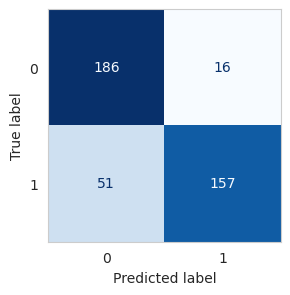

In [133]:
fig, ax=plt.subplots(figsize=(3,5))
conf_matrix_log=confusion_matrix(y_test, y_test_predict)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predict,cmap="Blues", ax=ax, colorbar=False)
plt.grid(visible=None)
plt.show()

In [134]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       202
           1       0.91      0.75      0.82       208

    accuracy                           0.84       410
   macro avg       0.85      0.84      0.84       410
weighted avg       0.85      0.84      0.84       410



In [135]:
accu_score_test_log=accuracy_score(y_test, y_test_predict)
accu_score_test_log

0.8365853658536585

### KNN

In [136]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [137]:
y_train_predict=knn_model.predict(X_train_scaled)
y_train_predict

array([0, 1, 0, ..., 1, 0, 1])

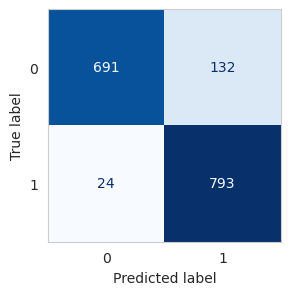

In [138]:
fig, ax=plt.subplots(figsize=(3,5))
knn_conf_matrix=confusion_matrix(y_train, y_train_predict)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predict,cmap="Blues",ax=ax, colorbar=False)
plt.grid(visible=None)
plt.show()

In [139]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       823
           1       0.86      0.97      0.91       817

    accuracy                           0.90      1640
   macro avg       0.91      0.91      0.90      1640
weighted avg       0.91      0.90      0.90      1640



In [140]:
accu_score_train_knn=accuracy_score(y_train, y_train_predict)
accu_score_train_knn

0.9048780487804878

In [141]:
y_test_predict=knn_model.predict(X_test_scaled)
y_test_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,

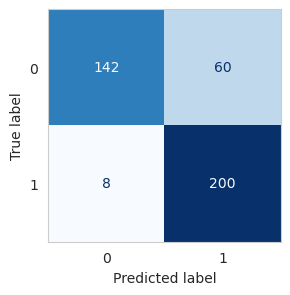

In [142]:
fig, ax=plt.subplots(figsize=(3,5))
knn_conf_matrix=confusion_matrix(y_test, y_test_predict)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predict,cmap="Blues",ax=ax, colorbar=False)
plt.grid(visible=None)
plt.show()

In [143]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.95      0.70      0.81       202
           1       0.77      0.96      0.85       208

    accuracy                           0.83       410
   macro avg       0.86      0.83      0.83       410
weighted avg       0.86      0.83      0.83       410



In [144]:
accu_score_test_knn=accuracy_score(y_test, y_test_predict)
accu_score_test_knn

0.8341463414634146

### Decision Tree

In [145]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [146]:
y_train_predict=dt_model.predict(X_train_scaled)
y_train_predict

array([0, 1, 0, ..., 1, 0, 1])

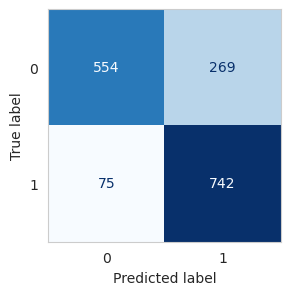

In [147]:
fig, ax=plt.subplots(figsize=(3,5))
dt_conf_matrix=confusion_matrix(y_train, y_train_predict)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predict,cmap="Blues",ax=ax, colorbar=False)
plt.grid(visible=None)
plt.show()

In [148]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76       823
           1       0.73      0.91      0.81       817

    accuracy                           0.79      1640
   macro avg       0.81      0.79      0.79      1640
weighted avg       0.81      0.79      0.79      1640



In [149]:
accu_score_train_dt=accuracy_score(y_train, y_train_predict)
accu_score_train_dt

0.7902439024390244

In [150]:
y_test_predict=dt_model.predict(X_test_scaled)
y_test_predict

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

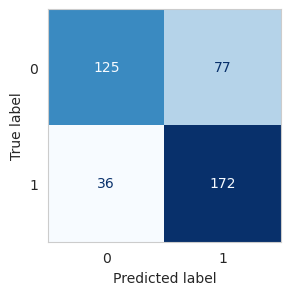

In [151]:
fig, ax=plt.subplots(figsize=(3,5))
dt_conf_matrix=confusion_matrix(y_test, y_test_predict)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predict,cmap="Blues",ax=ax, colorbar=False)
plt.grid(visible=None)
plt.show()

In [152]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.78      0.62      0.69       202
           1       0.69      0.83      0.75       208

    accuracy                           0.72       410
   macro avg       0.73      0.72      0.72       410
weighted avg       0.73      0.72      0.72       410



In [153]:
accu_score_test_dt=accuracy_score(y_test, y_test_predict)
accu_score_test_dt

0.724390243902439

### SVM

In [154]:
from sklearn import svm

svm_model=svm.SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

SVC()

In [155]:
y_train_predict=svm_model.predict(X_train_scaled)
y_train_predict

array([0, 1, 0, ..., 1, 0, 1])

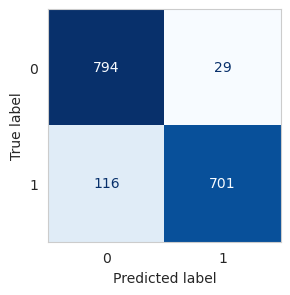

In [156]:
fig, ax=plt.subplots(figsize=(3,5))
svm_conf_matrix=confusion_matrix(y_train, y_train_predict)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predict,cmap="Blues",ax=ax, colorbar=False)
plt.grid(visible=None)
plt.show()

In [157]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92       823
           1       0.96      0.86      0.91       817

    accuracy                           0.91      1640
   macro avg       0.92      0.91      0.91      1640
weighted avg       0.92      0.91      0.91      1640



In [158]:
accu_score_train_svm=accuracy_score(y_train, y_train_predict)
accu_score_train_svm

0.9115853658536586

In [159]:
y_test_predict=svm_model.predict(X_test_scaled)
y_test_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,

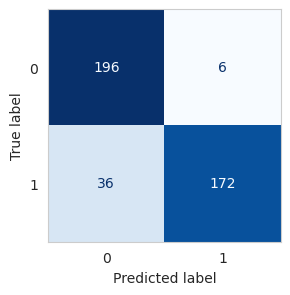

In [160]:
fig, ax=plt.subplots(figsize=(3,5))
svm_conf_matrix=confusion_matrix(y_test, y_test_predict)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predict,cmap="Blues",ax=ax, colorbar=False)
plt.grid(visible=None)
plt.show()

In [161]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       202
           1       0.97      0.83      0.89       208

    accuracy                           0.90       410
   macro avg       0.91      0.90      0.90       410
weighted avg       0.91      0.90      0.90       410



In [162]:
accu_score_test_svm=accuracy_score(y_test, y_test_predict)
accu_score_test_svm

0.8975609756097561

In [163]:
models=['Logistic_Regression', 'KNN', 'Decision_Tree', 'SVM']

data={'train':[accu_score_train_log,accu_score_train_knn,accu_score_train_dt,accu_score_train_svm],
'test':[accu_score_test_log,accu_score_test_knn,accu_score_test_dt,accu_score_test_svm]}

accuracy_scores=pd.DataFrame(data, index=[models])
accuracy_scores

,train,test
Logistic_Regression,0.870122,0.836585
KNN,0.904878,0.834146
Decision_Tree,0.790244,0.724390
SVM,0.911585,0.897561


* Based on accuaracy, choosing the svm model for prediction.

#### Hyperparameter tuning for SVM

In [164]:
from sklearn.model_selection import GridSearchCV
grid_parameters={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}
grid=GridSearchCV(svm.SVC(),grid_parameters)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


##### For these parameters again fitting the model

In [165]:
svm_model_hyp_para=svm.SVC(C=10,gamma=1,kernel='rbf')
svm_model_hyp_para.fit(X_train_scaled, y_train)

SVC(C=10, gamma=1)

In [166]:
y_train_predict=svm_model_hyp_para.predict(X_train_scaled)
y_train_predict

array([1, 1, 0, ..., 1, 0, 1])

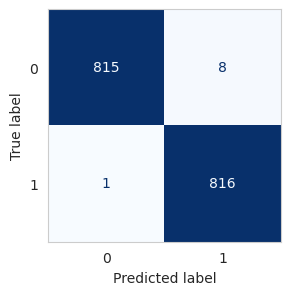

In [167]:
fig, ax=plt.subplots(figsize=(3,5))
svm_conf_matrix=confusion_matrix(y_train, y_train_predict)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predict,cmap="Blues",ax=ax, colorbar=False)
plt.grid(visible=None)
plt.show()

In [168]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       823
           1       0.99      1.00      0.99       817

    accuracy                           0.99      1640
   macro avg       0.99      0.99      0.99      1640
weighted avg       0.99      0.99      0.99      1640



#### Testing the model

In [169]:
y_test_predict=svm_model_hyp_para.predict(X_test_scaled)
y_test_predict

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,

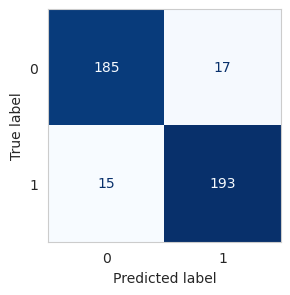

In [170]:
fig, ax=plt.subplots(figsize=(3,5))
svm_conf_matrix=confusion_matrix(y_test, y_test_predict)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predict,cmap="Blues",ax=ax, colorbar=False)
plt.grid(visible=None)
plt.show()

In [171]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       202
           1       0.92      0.93      0.92       208

    accuracy                           0.92       410
   macro avg       0.92      0.92      0.92       410
weighted avg       0.92      0.92      0.92       410

